<a href="https://colab.research.google.com/github/AlejandroSenabre/Proyecto-Data-Science-CoderHouse/blob/main/Proyecto_Prestamos_Bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final. Prestamos Bancarios

Alejandro Senabre

## **Índice**   
1. [Introducción](#id1)  
2. [Preview y carga del DataSet](#id2)  
3. [Data Wrangling](#id3)
- 3.1 *Manejo de datos nulos*
- 3.2 *Creación de la variable a predecir*
- 3.3 *Otras modificaciones*
4. [Analisis variables numericas](#id4)   
- 4.1 *Analisis univariado*
- 4.2 *Analisis de la tasa de interes*
5. [Analisis variables categoricas ](#id5)
- 5.1 *Analisis univariado*
- 5.2 *Analisis Bivariado*
6. [Modificaciones enfocados en la modelización ](#id6)
- 6.1 *Label Encoder*
- 6.2 *One Hot Encoder*
- 6.3 *Otras modificaciones*  
7. [Creación de modelos predictivos](#id7)   
- 7.1 *Principales modelos predictivos*
- 7.2 *Mejoramiento de los modelos*
- 7.3 *Modelos de Boosting*
8. [Modelo final y conclusiones](#id8)    


---

## 1. Introducción <a name="id1"></a>

Una de las funciones más importantes en un banco es su labor como prestamista de dinero, necesario para el crecimiento económico de un país al permitir a los usuarios hacerse de un monto de dinero en el apto que de otra forma le hubiera sido difícil o imposible de obtener, y esto es fundamental para mover la economía al ser habitualmente usado como método de financiación de diversos proyectos

Para un banco, hacer rentable el sistema de préstamos es fundamental para mantener su solvencia y continuar brindando servicios financieros a sus clientes. Esto implica que la banca debe financiarse con los intereses que cobra a sus clientes y tener un flujo de efectivo suficiente para poder seguir otorgando nuevos créditos y afrontar las pérdidas por morosidad. Este último es un factor clave que va a determinar la rentabilidad de un banco ya que es el mayor riesgo asociado con la concesión de préstamos. La morosidad puede ocurrir por múltiples causas, ya sea por no poseer los suficientes ingresos para afrontar el importe de las cuotas, tasas de intereses elevadas, monto total de la deuda excesivamente altos o por la simple falta de disposición para cumplir con los pagos.

Una de las principales causas que existen del aumento de la morosidad es el aumento de la tasa de interés, este aumento provoca que los prestatario tenga que devolver cada mes (o cada cierto tiempo pactado) una mayor cantidad de dinero, esto sucede ya que muchos prestamos estan acordada a una determinada tasa de interés que puede ser variable por diferentes indicadores o tasa de referencia, como la tasa LIBOR (promedio de tasa de interés ofrecida por los bancos de Londres) + un plus.

Hoy en dia vemos que la tasa de interés mundial aumenta constantemente por otro factor, la tasa de inflación. Al estar en un contexto mundial inflacionario fuerza a que la tasa de interés suba, y esto hace que nos preguntemos ¿Como puede afectar la tasa de interés a los prestamos ya dado ?

En este proyecto, con la base de datos que tenemos disponible de diferentes características de los préstamos dados, se tratará de predecir la posibilidad que tiene un prestamo en convertirse en deudor.

Esta investigación puede ser una herramienta valiosa para ayudar a la banca a tomar decisiones sobre las posibles perdidas ocacionada por la falta de pagos de sus clientes y poder actuar ante ello.

**<font color='blue'>Contexto comercial:</font>**
- Una banca que necesite realizar una previsión de incobrabilidad conociendo el estado de morosidad de sus clientes.
  
  

**<font color='blue'>Preguntas de interes: </font>**
- ¿Cómo puede llegar a afectar la tasa de interés a los prestamos dados?
- ¿Cuales son las principales variables que afecta a la morosidad?
- Ante una subida de la tasa de interés, ¿Cómo afectará a los prestamos ya dados?


## 2. Preview y carga del DataSet <a name="id2"></a>


El dataset fue obtenido a través de la página web de [*Kaggle*](https://www.kaggle.com/datasets/abhishek14398/loan-dataset?select=loan.csv), de datos que son parte del IIIT Bangalore Case study, Instituto Internacional de Tecnología de la Información de Bangalore, una universidad de investigación de India.

El origen de los datos no está especificado, por lo que no se sabe si es un dataset de un banco real o datos artificiales creados para este instituto, pero de todas formas nos van a resultar utiles para el analisis.

Lo interesante de estos datos es que nos proporciona una columna llamada "*loan_status*", la cual nos indica el estado actual del prestamo que varia con 3 diferentes estados posibles, si es deudor, si el prestamo acabo sin deudas o si actualmente esta vigente. Con esto se puede tener una mejor comprensión de cuales son las variables que tienen en común los deudores para separarlo de no deudores.

- <font color='blue'>Archivo:</font> data.csv
- <font color='blue'>Columnas:</font> 111
- <font color='blue'>Filas totales</font> 39.717

### 2.1 Carga de librerias y el Dataset
Se van a cargar las principales librerías de ciencias de datos a usar, tanto de manejo de los datos (pandas), gráficos (matplotlib) como los que nos servirán para hacer predicciones (scikitlearn).

In [ ]:
# librerías de manejo de datos
import numpy as np
import pandas as pd
# Librerías Gráficas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Estadistica y predicción
from   scipy import stats
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [ ]:
# Se carga el dataset desde Google Drive
from google.colab import drive
drive.mount('/content/drive')
ruta_archivo = '/content/drive/MyDrive/Programacion/Data_Science_CoderHouse/Entregas_Coder/Dataset/loan.csv'
df = pd.read_csv(ruta_archivo)
df_original=df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-106-17888cdee1e0>:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)


### 2.2 Descripción de las columas


Ya que tiene 111 columnas, solamente vamos a describir las columnas que no tienen valores nulos, esto lo haremos en el siguiente apartado, pero el resultado es el siguiente:
- **id**: Un identificador único asignado por LC para la lista del préstamo.
- **member_id**: Un identificador único asignado por LC para el miembro prestatario.
- **loan_amnt**: La cantidad solicitada del préstamo por el prestatario.
- **funded_amnt**: La cantidad total comprometida para ese préstamo en ese momento.
- **funded_amnt_inv**: La cantidad total comprometida por los inversores para ese préstamo en ese momento.
- **term**: El número de pagos en el préstamo. Los valores están en meses y pueden ser 36 o 60.
- **int_rate**: Tasa de interés del préstamo.
- **installment**: El pago mensual adeudado por el prestatario si el préstamo se origina.
- **grade**: Grado de préstamo asignado por LC.
- **sub_grade**: Subgrado de préstamo asignado por LC.
- **emp_title**: El título laboral proporcionado por el prestatario al solicitar el préstamo.
- **emp_length**: Antigüedad laboral en años. Los valores posibles son entre 0 y 10, donde 0 significa menos de un año y 10 significa diez o más años.
- **home_ownership**: El estado de propiedad de la vivienda proporcionado por el prestatario durante el registro. Los valores son: RENT (ALQUILER), OWN (PROPIA), MORTGAGE (HIPOTECA), OTHER (OTRA).
- **annual_inc**: Los ingresos anuales autodeclarados proporcionados por el prestatario durante el registro.
- **verification_status**: Indica si los ingresos fueron verificados por LC, no verificados o si la fuente de ingresos fue verificada.
- **issue_d**: El mes en que se financió el préstamo.
- **loan_status**: Estado actual del préstamo.
- **pymnt_plan**: Indica si se ha establecido un plan de pago para el préstamo.
- **url**: URL de la página LC con los datos de la lista.
- **desc**: Descripción del préstamo proporcionada por el prestatario.
- **purpose**: Una categoría proporcionada por el prestatario para la solicitud del préstamo.
- **title**: El título del préstamo proporcionado por el prestatario.
- **zip_code**: Los primeros 3 números del código postal proporcionado por el prestatario en la solicitud del préstamo.
- **addr_state**: El estado proporcionado por el prestatario en la solicitud del préstamo.
- **dti**: Una relación calculada utilizando los pagos mensuales totales del prestatario sobre las obligaciones de deuda totales, excluyendo la hipoteca y el préstamo solicitado a LC, dividida por los ingresos mensuales autodeclarados del prestatario.
- **delinq_2yrs**: El número de incidencias de morosidad de más de 30 días en el archivo de crédito del prestatario en los últimos 2 años.
- **earliest_cr_line**: El mes en que se abrió la primera línea de crédito reportada del prestatario.
- **inq_last_6mths**: El número de consultas en los últimos 6 meses (excluyendo consultas de automóviles e hipotecas).
- **open_acc**: El número de líneas de crédito abiertas en el archivo de crédito del prestatario.
- **pub_rec**: Número de registros públicos perjudiciales.
- **revol_bal**: Saldo total de crédito rotativo.
- **revol_util**: Tasa de utilización de la línea rotativa, o la cantidad de crédito que el prestatario está utilizando en relación con todo el crédito rotativo disponible.
- **total_acc**: El número total de líneas de crédito actualmente en el archivo de crédito del prestatario.
- **initial_list_status**: El estado de la lista inicial del préstamo. Los valores posibles son: W, F
- **out_prncp**: Saldo pendiente total para el monto total financiado.
- **out_prncp_inv**: Saldo pendiente total para la parte del monto total financiado por inversores.
- **total_pymnt**: Pagos recibidos hasta la fecha para el monto total financiado.
- **total_pymnt_inv**: Pagos recibidos hasta la fecha para la parte del monto total financiado por inversores.
- **total_rec_prncp**: Principal recibido hasta la fecha.
- **total_rec_int**: Intereses recibidos hasta la fecha.
- **total_rec_late_fee**: Cargos por mora recibidos hasta la fecha.
- **recoveries**: Recuperaciones brutas después de la cancelación.
- **collection_recovery_fee**: Tarifa de recuperación de cobros después de la cancelación.
- **last_pymnt_d**: Último mes en que se recibió un pago.
- **last_pymnt_amnt**: Última cantidad total de pago recibida.
- **next_pymnt_d**: Fecha programada para el próximo pago.
- **last_credit_pull_d**: El mes más reciente en que LC consultó el crédito para este préstamo.
- **collections_12_mths_ex_med**: Número de cobros en los últimos 12 meses excluyendo cobros médicos.
- **policy_code**: policy_code=1 significa que el código de política está disponible públicamente; policy_code=2 significa que los nuevos productos no están disponibles públicamente.
- **application_type**: Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.
- **acc_now_delinq**: El número de cuentas en las que el prestatario está actualmente en mora.
- **chargeoff_within_12_mths**: Número de cancelaciones de cobros en los últimos 12 meses.
- **delinq_amnt**: El monto vencido adeudado por las cuentas en las que el prestatario está actualmente en mora.
- **pub_rec_bankruptcies**: Número de quiebras de registros públicos.
- **tax_liens**: Número de embargos fiscales.

## 3. Data wrangling <a name="id3"></a>

Se hará un análisis rápido para verificar que los datos están correctamente cargados y poder eliminar datos innecesarios para su posterior análisis exhaustivo.

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 3.1 Manejo de Datos Nulos  <a name="id31"></a>

Al utilizar ``` df.head() ``` podemos observar que hay muchas columnas con valores faltantes, para verificar esto se graficará mediante la libreria *missingno* para ver su cuantia.  



<Figure size 1000x300 with 0 Axes>

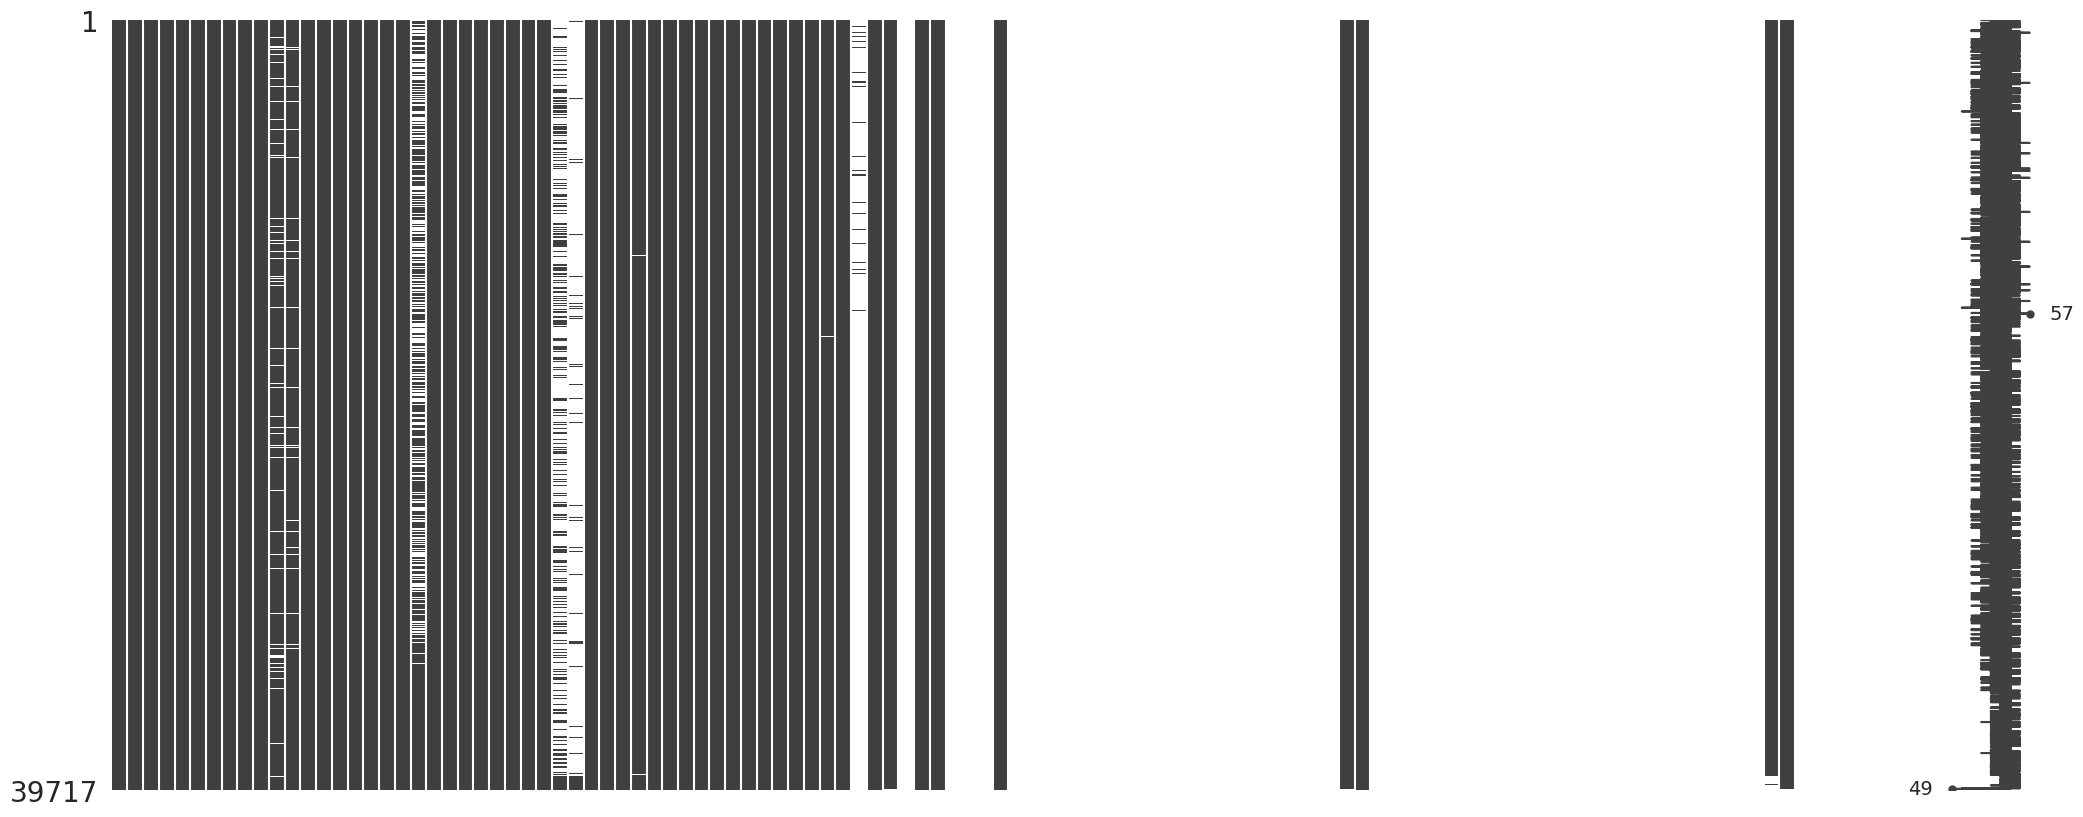

In [ ]:
import missingno as msno
# Full dataframe visualization of null values
plt.figure(figsize=(10, 3))
msno.matrix(df)
plt.show()

Se aprecia bastantes columnas con valores vacios, por lo que se procederá a descartarlas

In [ ]:
# Obtener las columnas con todos los valores nulos.
columnas_nulas = df.columns[df.isnull().all()]
print("La cantidad de columnas con valores vacios es: " , columnas_nulas.shape[0],'\n')
# Mostrar las columnas con todos los valores nulos
print("Las columnas son las siguientes: ", '\n','\n', columnas_nulas)

La cantidad de columnas con valores vacios es:  54 

Las columnas son las siguientes:  
 
 Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m

In [ ]:
#Elimnando las columnas nulas
df= df.drop(columnas_nulas, axis=1)

In [ ]:
# Se verifica que funcionó y que no se encuentre ninguna variable con 100% de
#sus valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
# Vemos el total de columnas y filas que posee nuestro dataset.
print(df.shape)

(39717, 57)


In [ ]:
# Cantidad de columnas que aun posee datos nulos que posteriormente analizaremos
df[df.columns[df.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   desc                        26777 non-null  object 
 3   title                       39706 non-null  object 
 4   mths_since_last_delinq      14035 non-null  float64
 5   mths_since_last_record      2786 non-null   float64
 6   revol_util                  39667 non-null  object 
 7   last_pymnt_d                39646 non-null  object 
 8   next_pymnt_d                1140 non-null   object 
 9   last_credit_pull_d          39715 non-null  object 
 10  collections_12_mths_ex_med  39661 non-null  float64
 11  chargeoff_within_12_mths    39661 non-null  float64
 12  pub_rec_bankruptcies        39020 non-null  float64
 13  tax_liens                   396

### 3.2 Creación de la variable a predecir  <a name="id32"></a>

Se va transformar la columna dependiente, la variable mas importante de nuestro dataset ya que nos va a permitir categorizar los datos y poder aplicar un modelo predictivo al mismo.

In [ ]:
# Valores unicos de la columas
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
# Cantidad de valores por cada variable unica de la columna.
conteo = df['loan_status'].value_counts()
print(conteo)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


Queremos obtener una categorización binaria, es decir, que tenga solamente dos unicos valores. Por lo que vamos a descartar los prestamos en condición de "current", estos son los prestamos que aun están en devolución, por lo que no sabemos si podran caer como deudores, o que finalizaran correctamente todos sus pagos.

Tendriamos dos opciones, integrarlo a la variable "Fully Paid" considerando que no tendrán problemas con sus pagos, o descartarlos. Se hará esto último.

In [ ]:
# Descartando los valores "current" de la columna "loan_status"
df = df[df['loan_status'] != 'Current']

In [ ]:
# Contar los valores de cada categoría en la columna "loan_status"
counts = df['loan_status'].value_counts()

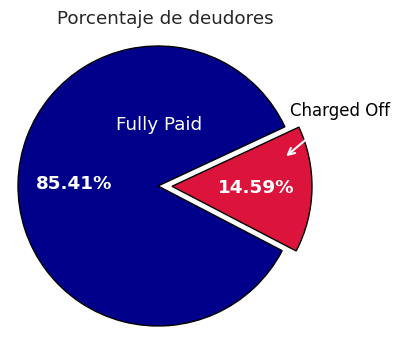

In [ ]:
# Crear el gráfico de torta usando plt.subplots
fig, ax = plt.subplots(figsize=(4, 4))
pie = ax.pie(counts,
             explode=(0, 0.1),
             shadow=False,
             startangle=25,
             autopct='%1.2f%%',
             colors=['#00008B', '#DC143C'],
             wedgeprops={'edgecolor': 'black', 'linewidth': 1},
             textprops={'color': 'white', 'weight': 'bold'})

# Añadir anotaciones personalizadas para cada porción de la torta
annotate_kwargs = {'arrowprops': {'arrowstyle': '->', 'linewidth': 1.5},
                   'fontsize': 12, 'color': 'black', 'ha': 'center'}
ax.annotate(counts.index[1], xy=(0.9, 0.2), xytext=(1.3, 0.5), **annotate_kwargs)
ax.annotate(counts.index[0], xy=(0.4, 0.4), xytext=(-0.3, 0.4), textcoords="data", color='white')

ax.axis('equal')
plt.title("Porcentaje de deudores")
plt.show()


Lo siguiente que se hará es pensando ya en el modelaje, se cambiara los valores a valores binarios de 1 y 0. Siendo 1 para los prestamos que están considerados deudores y 0 los que no tuvieron problemas con los pagos.

In [ ]:
# Se reemplaza los valores
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 0, 'Charged Off':1 })

In [ ]:
# Se verifica que haya funcionado el reemplazo.
conteo = df['loan_status'].value_counts()
print(conteo)

0    32950
1     5627
Name: loan_status, dtype: int64


### 3.3 Otras modificaciones  <a name="id33"></a>

Pensando en el modelo que pueda predecir si un prestamos es deudor o no, solamente vamos a necesitar las columnas que nos digan información que se obtiene antes de sacar el prestamo, las demas columnas ya póseen información sobre la morosidad, por lo que puede afectar al modelo asi que se descartaran.

In [ ]:
# Lista de columnas a eliminar
columnas_eliminar = [
    'id',
    'member_id',
    'funded_amnt',
    'funded_amnt_inv',
    'issue_d',
    'url',
    'desc',
    'title',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'policy_code',
    'acc_now_delinq',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'pub_rec_bankruptcies',
    'tax_liens'
]

# Eliminar las columnas del dataframe
df = df.drop(columnas_eliminar, axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   term                    38577 non-null  object 
 2   int_rate                38577 non-null  object 
 3   installment             38577 non-null  float64
 4   grade                   38577 non-null  object 
 5   sub_grade               38577 non-null  object 
 6   emp_title               36191 non-null  object 
 7   emp_length              37544 non-null  object 
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  loan_status             38577 non-null  int64  
 12  pymnt_plan              38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  zip_code                38577 non-null

## 4. Analisis variables numericas <a name="id4"></a>

Se graficará mediante histogramas todas las variables numericas para poder analizar su distribución y su composición.

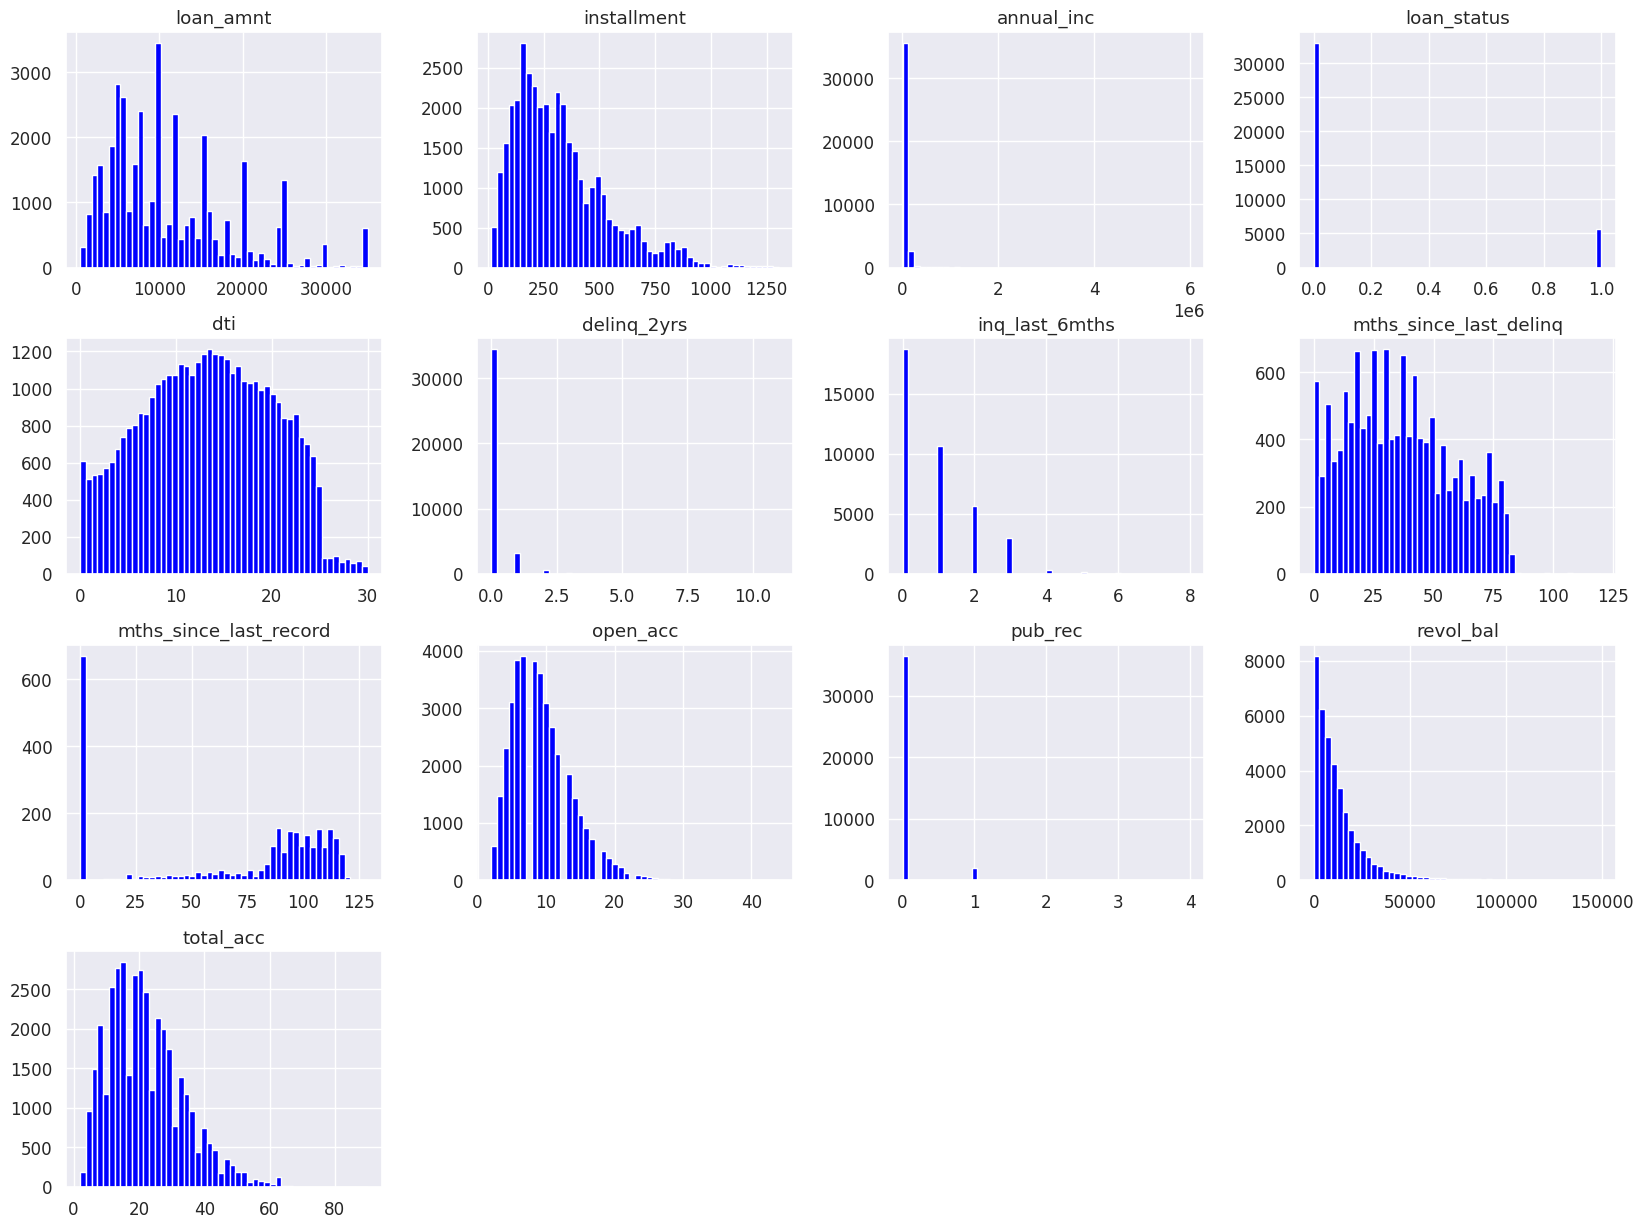

In [ ]:
df.hist(bins=50,figsize=(20,15), color="blue")
plt.show()

Se analizará si hay valores unicos en alguna columna para ver si es posible su eliminación o modificación .

In [ ]:
categoricos2 = df.select_dtypes(include=['float64',"int64"]).columns
for i in categoricos2:
    print("Valores unicos en la columna...",i,"... son: ",df.loc[:,i].nunique())

Valores unicos en la columna... loan_amnt ... son:  870
Valores unicos en la columna... installment ... son:  15022
Valores unicos en la columna... annual_inc ... son:  5215
Valores unicos en la columna... loan_status ... son:  2
Valores unicos en la columna... dti ... son:  2853
Valores unicos en la columna... delinq_2yrs ... son:  11
Valores unicos en la columna... inq_last_6mths ... son:  9
Valores unicos en la columna... mths_since_last_delinq ... son:  95
Valores unicos en la columna... mths_since_last_record ... son:  111
Valores unicos en la columna... open_acc ... son:  40
Valores unicos en la columna... pub_rec ... son:  5
Valores unicos en la columna... revol_bal ... son:  21275
Valores unicos en la columna... total_acc ... son:  82


Se observan algunos valores que deberian ser numericos y no aparecen en la lista, entre ellos la tasa de interes, por lo que se tendra que ver el error.

In [ ]:
# Veremos 3 de las columnas que tenemos sospecha
df[['int_rate', 'revol_util','zip_code']].head()

,int_rate,revol_util,zip_code
0,10.65%,83.70%,860xx
1,15.27%,9.40%,309xx
2,15.96%,98.50%,606xx
3,13.49%,21%,917xx
5,7.90%,28.30%,852xx


Al tener el simbolo del porcenaje "%" dentro de la variable, pandas lo considera como una variable categorica y no numerica como queremos, por lo que vamos a modificarlo quitando ese caracter. Lo mismo para "zip_code" descartando los "xx".

In [ ]:
# Se reemplaza "%" por un caracter en blanco.
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [ ]:
df['zip_code'] = df['zip_code'].str.replace('xx', '')

In [ ]:
# Se cambia el tipo de variable.
df['zip_code'] =df['zip_code'].astype('float')

### 4.1 Analisis univariado <a name="id41"></a>

Se creará un boxplot de las principales variables para ver si tienen algun tipo de outliers.

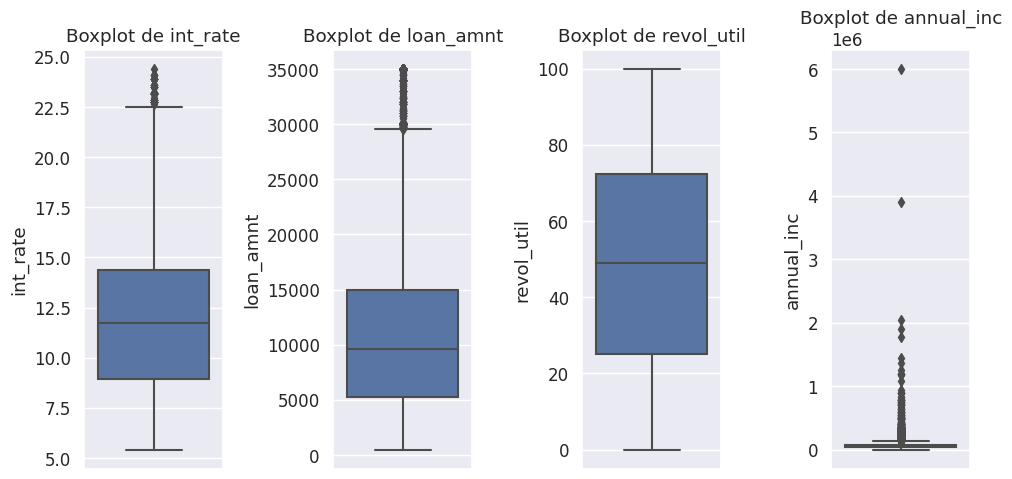

In [ ]:
# Definir las columnas para los boxplots
columnas = ['int_rate', 'loan_amnt','revol_util', 'annual_inc']

# Crear la cuadrícula de subtramas
fig, axs = plt.subplots(1, len(columnas), figsize=(10, 5) )

# Iterar sobre las columnas y trazar los boxplots
for i, columna in enumerate(columnas):
    sns.boxplot(data=df, y=columna, ax=axs[i])
    axs[i].set_title('Boxplot de {}'.format(columna))
    axs[i].set_ylabel(columna)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [ ]:
print(df['loan_amnt'].mean())

11047.02542966016


El principal problema se observa en "annual_inc" donde hay un par de datos muy alejados del resto.

In [ ]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
df["annual_inc"].quantile(0.95)

140004.0

Se eliminará el 5% de datos outliers, para dejar el 95% restante.

In [ ]:
df=df[df["annual_inc"]< df["annual_inc"].quantile(0.95)]

In [ ]:
df['annual_inc'].describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

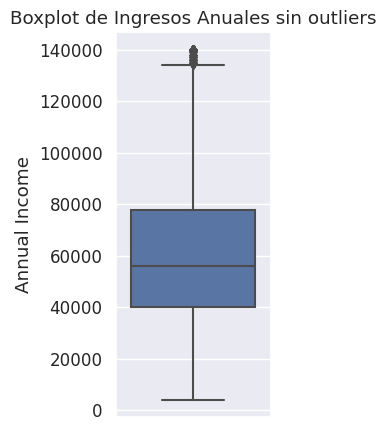

In [ ]:
# Crear el boxplot
plt.figure(figsize=(2, 5
                    ))
sns.boxplot(data=df, y='annual_inc')
plt.title('Boxplot de Ingresos Anuales sin outliers')
plt.ylabel('Annual Income')
plt.show()

Finalmente se puede ver el verdadero valor, sin considerar los pequeños outliers que afectaban a la medición.

### 4.2 Analisis de la tasa de interes  <a name="id42"></a>

Uno de las variables mas influyentes en la morisidad es la tasa de Interés, una tasa mas elevada generalmente significa que la persona es mas riesgosa para adquirir el prestamo, pero a su vez, hace que a esta persona le cueste mas pagar su deudo mes tras mes, por lo que aumenta significativamente su probabilidades de caer como moroso.

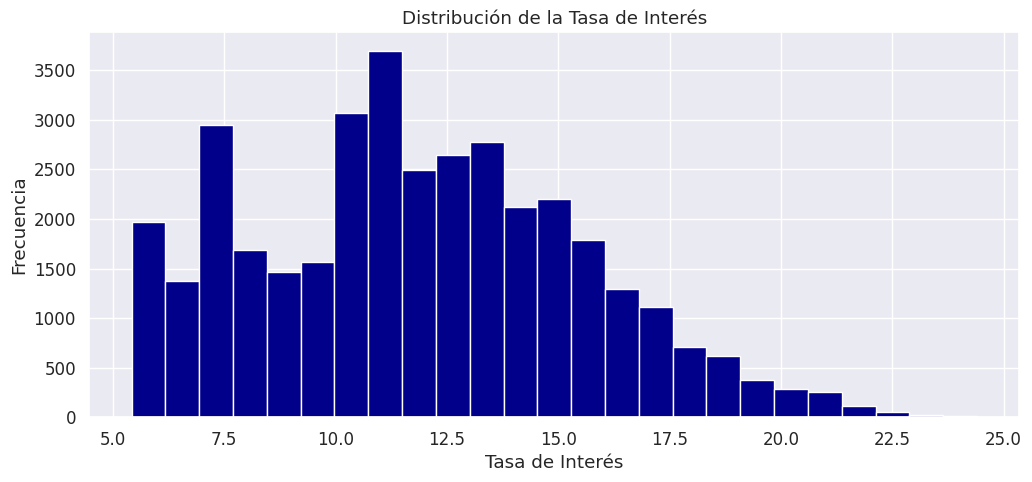

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['int_rate'], bins=25, edgecolor='white', color='#00008B')
ax.set_xlabel('Tasa de Interés')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de la Tasa de Interés')

plt.show()


Se observa que tiene una distribución semejante a una función de distribución normal sin considerar la cola inicial que es bastante elevada.

Se va a agrupar la tasa de interes en rangos para poder apreciar mejor el efecto de la tasa de interes.

In [ ]:
# Definir los límites para las categorías de tasas de interés
limits = [0, 5, 8, 10, 12.5, 14, 16, 18, 20, float('inf')]

# Definir las etiquetas para las categorías de tasas de interés
labels = ['0-5', '5-8', '8-10', '10-12.5', '12.5-14', '14-16', '16-18', '18-20', '20+']

# Crear la columna 'interest_rate_categories' con las categorías personalizadas
df['interest_rate_categories'] = pd.cut(df['int_rate'], bins=limits, labels=labels)

# Mostrar el DataFrame con la nueva columna de categorías
print(df[['int_rate', 'interest_rate_categories']])


       int_rate interest_rate_categories
0         10.65                  10-12.5
1         15.27                    14-16
2         15.96                    14-16
3         13.49                  12.5-14
5          7.90                      5-8
...         ...                      ...
39711      8.70                     8-10
39712      8.07                     8-10
39713     10.28                  10-12.5
39714      8.07                     8-10
39716     13.75                  12.5-14

[36642 rows x 2 columns]


In [ ]:
import pandas as pd

# Supongamos que tienes las columnas 'tasa_interes_categorias' y 'loan_status' en tu DataFrame 'df'
# y que has realizado el cálculo de las frecuencias y proporciones de Charged Off y Fully Paid como lo has descrito

# Agrupar los datos por las categorías de tasas de interés y estado de préstamo
interest_vs_loan = df.groupby(['interest_rate_categories', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()

# Calcular el total de préstamos en cada categoría de tasa de interés
interest_vs_loan['Total'] = interest_vs_loan[1] + interest_vs_loan[0]

# Calcular la proporción de Charged Off en cada categoría de tasa de interés
interest_vs_loan['Proporcion_ChargedOff'] = interest_vs_loan[1] / interest_vs_loan['Total']

# Ordenar el DataFrame por la columna 'Proporcion_ChargedOff' de mayor a menor
interest_vs_loan_sorted = interest_vs_loan.sort_values('Proporcion_ChargedOff', ascending=True)

# Mostrar el DataFrame ordenado
print(interest_vs_loan_sorted)


loan_status interest_rate_categories     0     1  Total  Proporcion_ChargedOff
1                                5-8  7469   434   7903               0.054916
2                               8-10  3540   378   3918               0.096478
3                            10-12.5  7709  1194   8903               0.134112
4                            12.5-14  4968   974   5942               0.163918
5                              14-16  4006   977   4983               0.196067
6                              16-18  2193   780   2973               0.262361
7                              18-20   936   411   1347               0.305122
8                                20+   405   268    673               0.398217
0                                0-5     0     0      0                    NaN


<ipython-input-139-c51291a33db5>:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Promedio deudor 14.6%', xy=(0.1, 0.146), xytext=(0.05, 0.2),


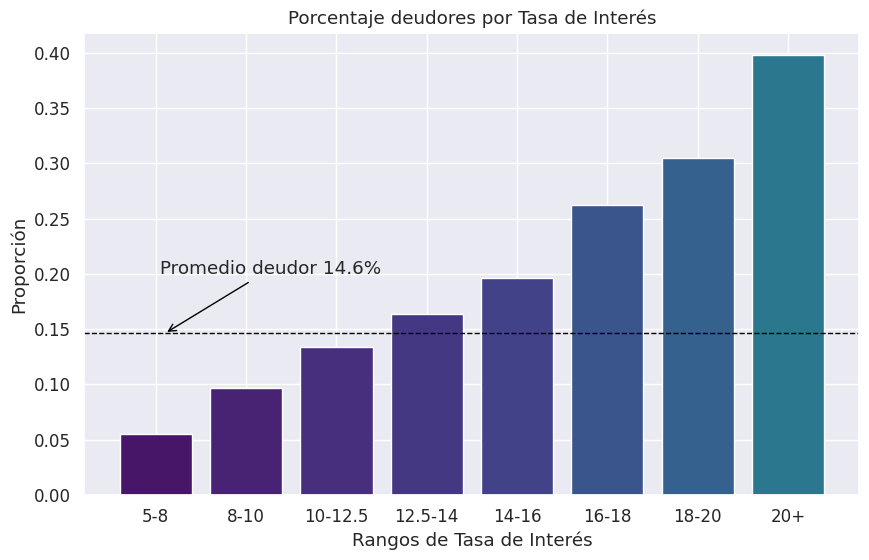

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes el DataFrame interest_vs_loan_sorted con las columnas 'interest_rate_categories', 0 y 1
# y que ya has realizado el cálculo de 'Total' y 'Proporcion_ChargedOff' como lo has descrito

# Crear el gráfico de barras utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(interest_vs_loan_sorted['interest_rate_categories'], interest_vs_loan_sorted['Proporcion_ChargedOff'], color=plt.cm.viridis(interest_vs_loan_sorted['Proporcion_ChargedOff']))
plt.xlabel('Rangos de Tasa de Interés')
plt.ylabel('Proporción')
plt.title('Porcentaje deudores por Tasa de Interés')
# Agregar la línea horizontal en el valor promedio
plt.axhline(y=0.146, color='black', linestyle='--', linewidth=1)

# Agregar la flecha y la etiqueta "valor promedio"
plt.annotate('Promedio deudor 14.6%', xy=(0.1, 0.146), xytext=(0.05, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

# Mostrar el gráfico
plt.show()


Claramente se aprecia lo que habiamos descrito anteriormente, a cuanto mayor es la tasa de interés que se adquiere el prestamo, hay mas posibilidades de caer deudor, vemos que si sobrepasa los 20% , llega a un 40% de morosidad, es decir que 2 de cada 5 prestamos que se fijan a esas tasas de interes, terminan con problemas en los pagos.

In [ ]:
deudores = df.loc[df['loan_status']>0]
no_deudores = df.loc[df['loan_status']==0]
import scipy.stats as stats  #Libreria de Estadisticas
media_d = deudores['int_rate'].mean()
moda_d =deudores['int_rate'].mode().values[0]
varianza_d = deudores['int_rate'].var()
std_dev_d = deudores['int_rate'].std()  #### Desvio estandar
asimetria_d = deudores['int_rate'].skew()  ### Asimetria
curtosis_d = deudores['int_rate'].kurtosis() ###curtosis
#########################################################
media_nd = no_deudores['int_rate'].mean()
moda_nd =no_deudores['int_rate'].mode().values[0]
varianza_nd = no_deudores['int_rate'].var()
std_dev_nd = no_deudores['int_rate'].std()  #### Desvio estandar
asimetria_nd = no_deudores['int_rate'].skew()  ### Asimetria
curtosis_nd = no_deudores['int_rate'].kurtosis() ###curtosis
#########################################################
media_l = df['int_rate'].mean()
moda_l = df['int_rate'].mode().values[0]
varianza_l = df['int_rate'].var()
std_dev_l = df['int_rate'].std()  #### Desvio estandar
asimetria_l = df['int_rate'].skew()  ### Asimetria
curtosis_l = df['int_rate'].kurtosis() ###curtosis

In [ ]:
from tabulate import tabulate
analysis_table = pd.DataFrame({
    'Medida estadistica': ['Media', 'Moda', 'Varianza', 'Desvío estándar', 'Asimetría', 'Curtosis'],
    'Valor tasa de interes': [media_l, moda_l, varianza_l, std_dev_l, asimetria_l, curtosis_l],
    'Interes: morosos': [media_d, moda_d, varianza_d, std_dev_d, asimetria_d, curtosis_d],
    'Interes: no morosos':[media_nd, moda_nd, varianza_nd, std_dev_nd, asimetria_nd, curtosis_nd]
})

In [ ]:
print(tabulate(analysis_table, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════╤═════════════════════════╤════════════════════╤═══════════════════════╕
│    │ Medida estadistica   │   Valor tasa de interes │   Interes: morosos │   Interes: no morosos │
╞════╪══════════════════════╪═════════════════════════╪════════════════════╪═══════════════════════╡
│  0 │ Media                │               11.8879   │         13.7573    │             11.5636   │
├────┼──────────────────────┼─────────────────────────┼────────────────────┼───────────────────────┤
│  1 │ Moda                 │               10.99     │         13.49      │             10.99     │
├────┼──────────────────────┼─────────────────────────┼────────────────────┼───────────────────────┤
│  2 │ Varianza             │               13.4481   │         13.184     │             12.783    │
├────┼──────────────────────┼─────────────────────────┼────────────────────┼───────────────────────┤
│  3 │ Desvío estándar      │                3.66716  │          3.63098   │              3

Para las morosos, la tasa de interes tiene una media y desvio mas elevados, lo que significa que su curva de probabilidad está mas a la derecha que los no mororos.

#### Correlacion entre las variables

In [ ]:
loan_correlation=df.corr()

<ipython-input-143-089a673f352d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation=df.corr()


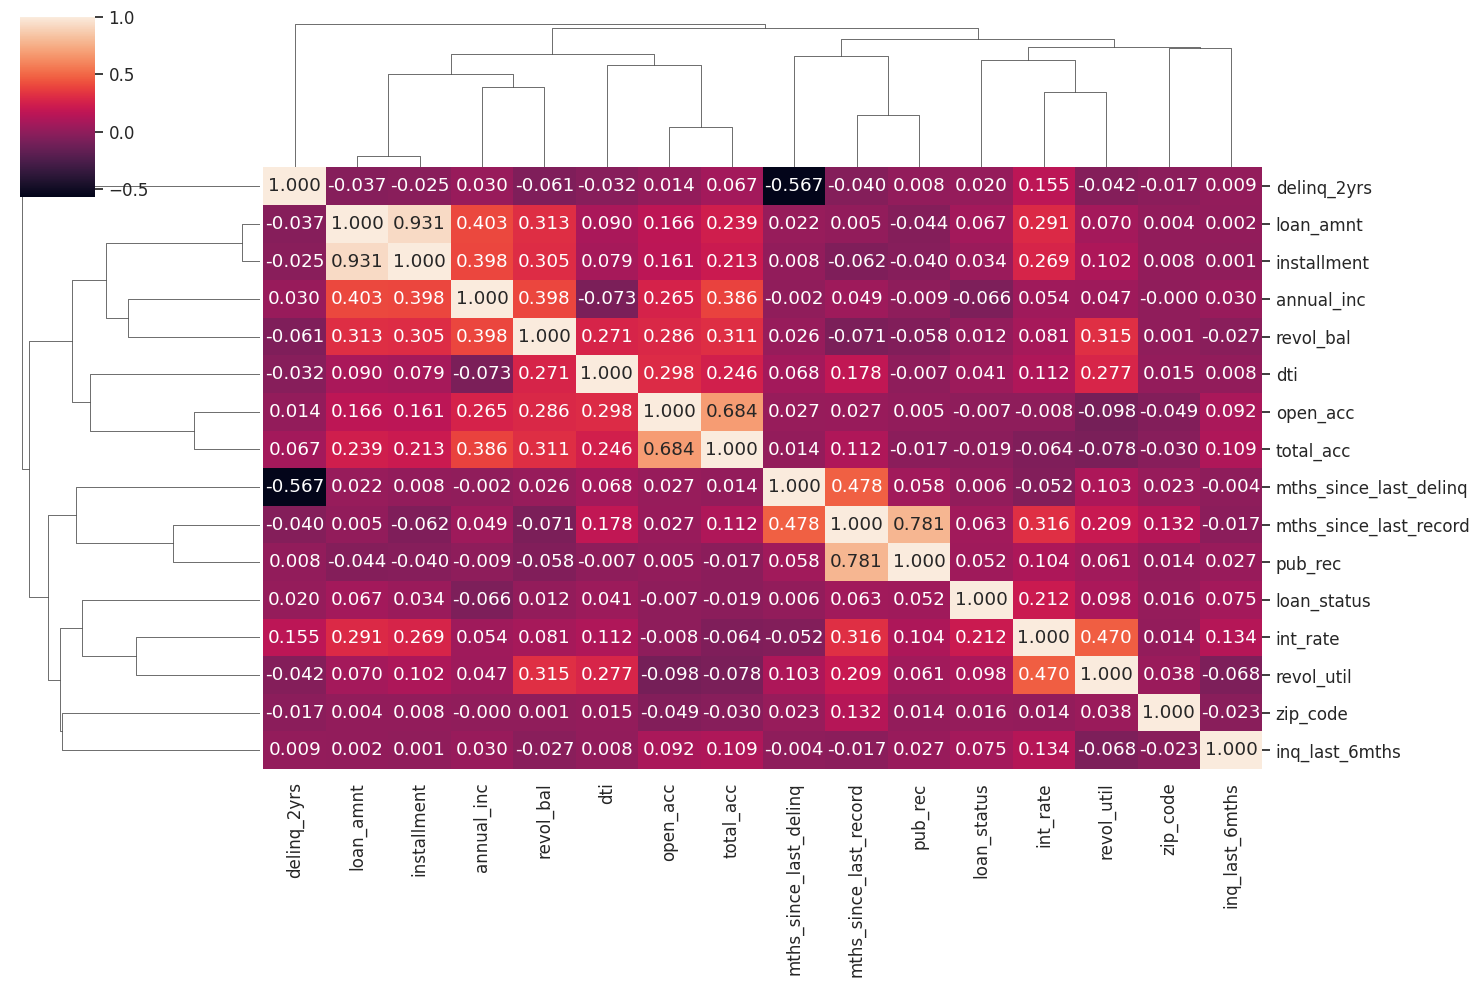

In [ ]:
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(15,10), fmt=".3f")
plt.show()

No se observan variables muy correlacionadas entre si, salvo unos casos puntuales

## 5. Analisis variables categoricas  <a name="id5"></a>

In [ ]:
categoricos = df.select_dtypes(include='object').columns
for i in categoricos:
    print("Valores unicos en la columna...",i,"... son: ",df.loc[:,i].nunique())

Valores unicos en la columna... term ... son:  2
Valores unicos en la columna... grade ... son:  7
Valores unicos en la columna... sub_grade ... son:  35
Valores unicos en la columna... emp_title ... son:  26846
Valores unicos en la columna... emp_length ... son:  11
Valores unicos en la columna... home_ownership ... son:  5
Valores unicos en la columna... verification_status ... son:  3
Valores unicos en la columna... pymnt_plan ... son:  1
Valores unicos en la columna... purpose ... son:  14
Valores unicos en la columna... addr_state ... son:  50
Valores unicos en la columna... earliest_cr_line ... son:  522
Valores unicos en la columna... initial_list_status ... son:  1
Valores unicos en la columna... application_type ... son:  1


Los que poseen valores unicos se pueden eliminar mientras los que tienen pocos valores se puede buscar una manera de asignarle un valor numero. Los que son muy elevados como "emp_title" se descartará si no se consigue una manera optima de agruparlos.

### 5.1 Analisis univariado  <a name="id51"></a>

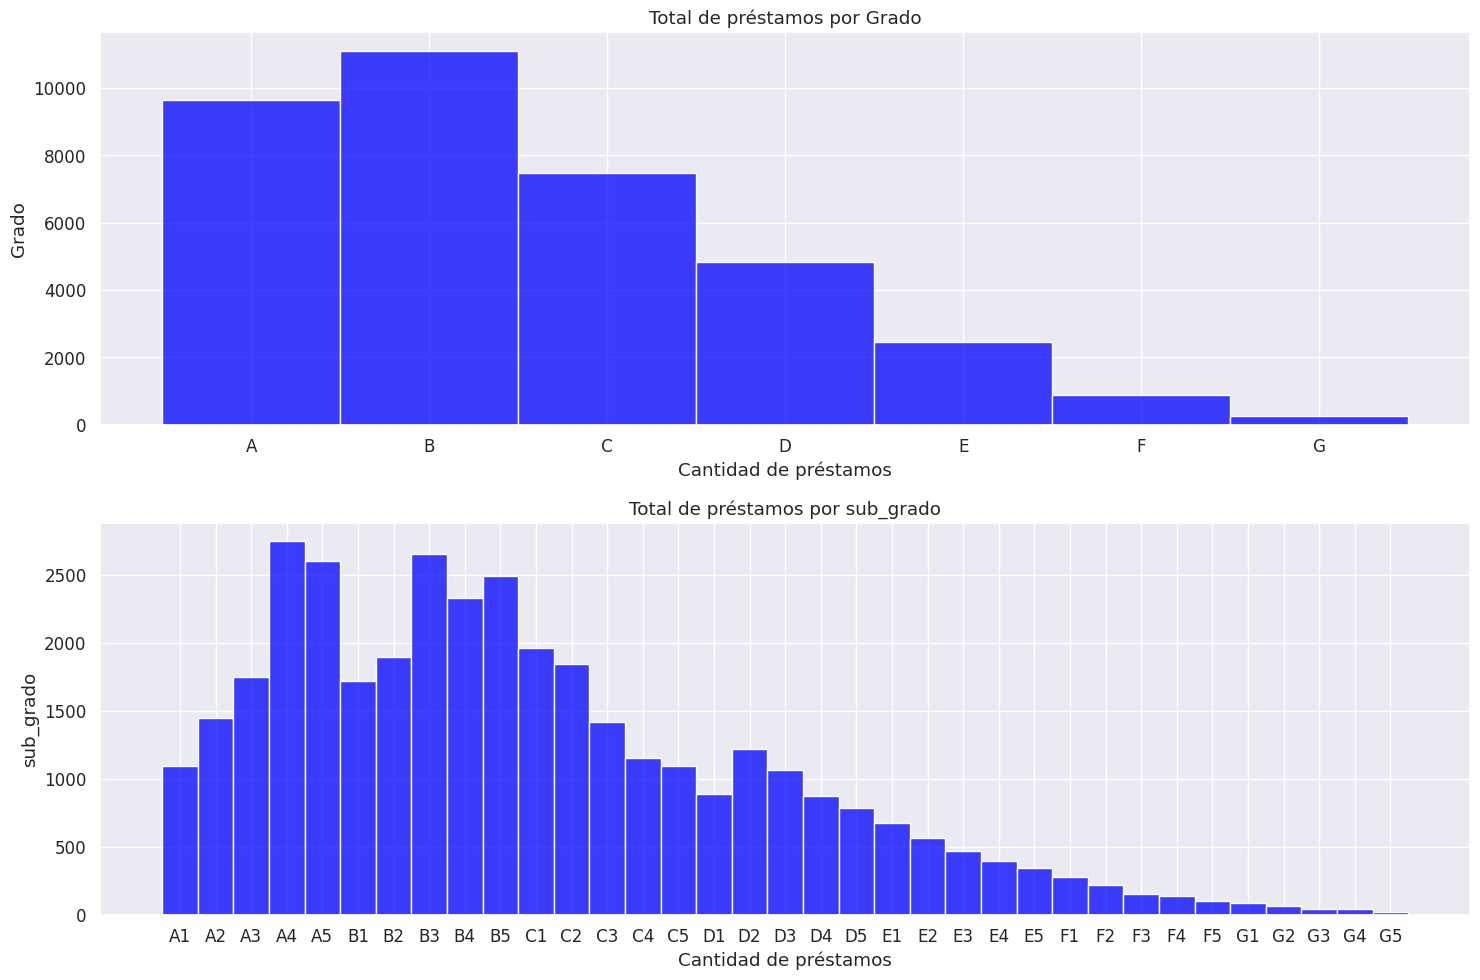

In [ ]:

# Crear la figura y los ejes de subparcelas
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Primer histplot
sns.histplot(data=df.sort_values('grade'), x="grade", ax=axes[0],color='blue')
axes[0].set_xlabel("Cantidad de préstamos")
axes[0].set_ylabel("Grado")
axes[0].set_title("Total de préstamos por Grado")

# Segundo histplot
sns.histplot(data=df.sort_values('sub_grade'), x="sub_grade", ax=axes[1],color='blue')
axes[1].set_xlabel("Cantidad de préstamos")
axes[1].set_ylabel("sub_grado")
axes[1].set_title("Total de préstamos por sub_grado")

# Ajustar el diseño de las subparcelas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
col_uni=['application_type','initial_list_status','pymnt_plan']
for i in col_uni:
    conteo = df[i].value_counts().sort_index()
    print("Valores unicos para la columna:   ", i)
    print(conteo)
    print('-----------------------------------------------')

Valores unicos para la columna:    application_type
INDIVIDUAL    36642
Name: application_type, dtype: int64
-----------------------------------------------
Valores unicos para la columna:    initial_list_status
f    36642
Name: initial_list_status, dtype: int64
-----------------------------------------------
Valores unicos para la columna:    pymnt_plan
n    36642
Name: pymnt_plan, dtype: int64
-----------------------------------------------


Por lo tanto, ya que el total de los valores unicos es igual al total de filas, se puede eliminar estas columnas

In [ ]:
df= df.drop(col_uni, axis=1)

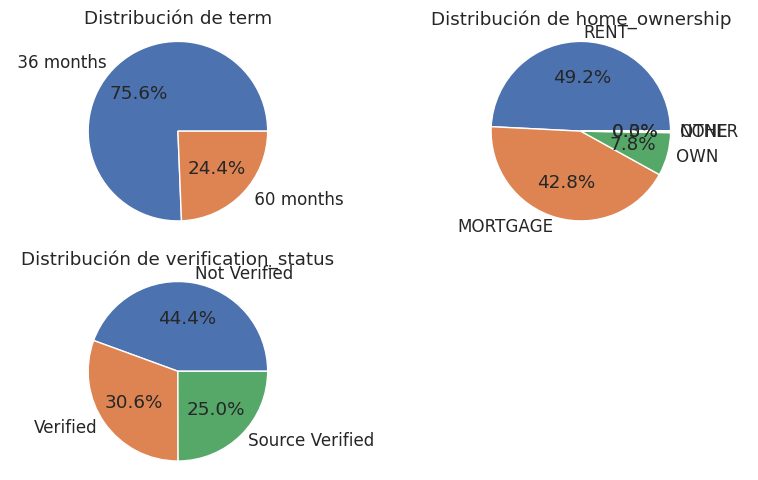

In [ ]:
columnas = ['term', 'home_ownership', 'verification_status']

plt.figure(figsize=(8, 5))

for i, columna in enumerate(columnas, 1):
    plt.subplot(2, 2, i)
    counts = df[columna].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title('Distribución de {}'.format(columna))
    plt.axis('equal')

plt.tight_layout()
plt.show()

### 5.2 Analisis Bivariado  <a name="id52"></a>

Principalmente se analizará los disntintos rangos de interés

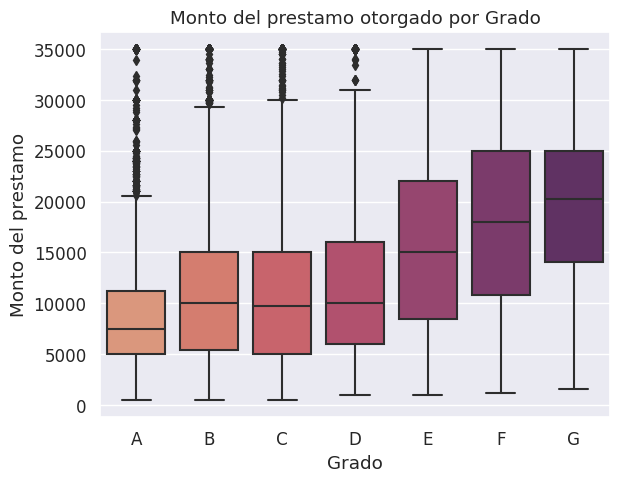

In [ ]:
sns.boxplot(data=df_original.sort_values('grade'),x='grade', y="loan_amnt", palette="flare")
plt.tight_layout()
plt.xlabel("Grado")
plt.ylabel("Monto del prestamo")
plt.title("Monto del prestamo otorgado por Grado")
plt.show()

In [ ]:
grade_vs_loan=df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan[1] + grade_vs_loan[0]
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan[1]/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=True)

loan_status,grade,0,1,Total,ChargedOff_Proportion
0,A,9050,593,9643,0.061495
1,B,9720,1376,11096,0.124009
2,C,6153,1324,7477,0.177076
3,D,3754,1080,4834,0.223417
4,E,1786,659,2445,0.269530
5,F,597,289,886,0.326185
6,G,166,95,261,0.363985


Se calcula el porcentaje de morosidad de cada valor.

<ipython-input-152-13b7ce371db1>:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Promedio deudor 14.6%', xy=(0.1, 0.146), xytext=(0.05, 0.2),


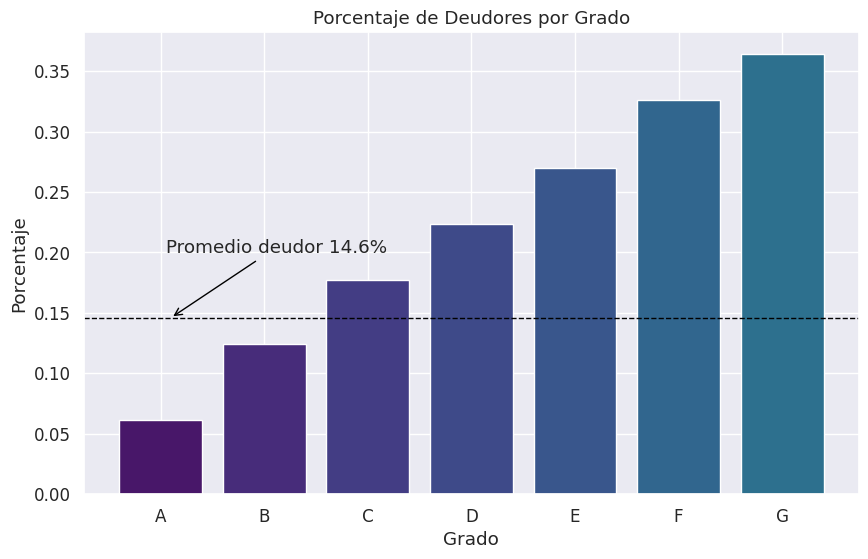

In [ ]:
grade_vs_loan_sorted = grade_vs_loan.sort_values('ChargedOff_Proportion', ascending=True)

# Crear el gráfico de histograma
plt.figure(figsize=(10, 6))
plt.bar(grade_vs_loan_sorted['grade'], grade_vs_loan_sorted['ChargedOff_Proportion'], color=plt.cm.viridis(grade_vs_loan_sorted['ChargedOff_Proportion']))
plt.xlabel('Grado')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Deudores por Grado')

# Agregar la línea horizontal en el valor promedio
plt.axhline(y=0.146, color='black', linestyle='--', linewidth=1)

# Agregar la flecha y la etiqueta "valor promedio"
plt.annotate('Promedio deudor 14.6%', xy=(0.1, 0.146), xytext=(0.05, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

# Mostrar el gráfico
plt.show()


## 6. Modificaciones enfocados en la modelización <a name="id6"></a>

### 6.1 Label Encoder  <a name="id61"></a>

En esta sección se cambiaran los valores categoricos por unos numericos.
En el caso de "Grade" y "Sub_grade" al ser variables ordinales, donde A es el grado mas bajo, mientras que G es el mas alto, le podemos dar valores numericos progresivos.

In [ ]:
print(df['grade'].value_counts().sort_index())

A     9643
B    11096
C     7477
D     4834
E     2445
F      886
G      261
Name: grade, dtype: int64


In [ ]:
df['grade'] = df['grade'].replace({'A': 1, 'B': 2, 'C':3 , 'D':4 , 'E':5, 'F':6 , 'G':7})

In [ ]:
df = df.sort_values('sub_grade')   ## Ordenamos los datos por "sub_grade"
df['sub_grade'] = LabelEncoder().fit_transform(df['sub_grade']) + 1   #Sumo 1 para que no arranque con 0.
df = df.sort_index()                            # Volvemos a ordenarlo por el indice
# print(df['sub_grade'].value_counts().sort_index())   #Vemos si funcionó correctamente

##### Columna "Term"

In [ ]:
conteo = df['term'].value_counts().sort_index()
conteo

 36 months    27714
 60 months     8928
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].replace({' 36 months':36 , ' 60 months':60})

##### Columna "emp_length"

In [ ]:
conteo = df['emp_length'].value_counts().sort_index()
conteo

1 year       3043
10+ years    7884
2 years      4101
3 years      3823
4 years      3197
5 years      3044
6 years      2073
7 years      1643
8 years      1341
9 years      1152
< 1 year     4327
Name: emp_length, dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].replace({'< 1 year':0.5, '1 year':1, '2 years': 2, '3 years':3
                                             , '4 years':4 , '5 years':5, '6 years':6 , '7 years':7,'8 years':8,
                                             '9 years':9,'10+ years':11 })

In [ ]:
df['emp_length'].isnull().sum()

1014

In [ ]:
df['emp_length']=df['emp_length'].fillna(0)

##### Columna "addr_state"

In [ ]:
df['addr_state']

0        AZ
1        GA
2        IL
3        CA
5        AZ
         ..
39711    CO
39712    CO
39713    NC
39714    MA
39716    MA
Name: addr_state, Length: 36642, dtype: object

In [ ]:
df['addr_state'] = LabelEncoder().fit_transform(df['addr_state'])

### 6.2 One Hot Encoder  <a name="id62"></a>

A las columnas que tienenpocos valores y no pueden ser ordenados de menos a mayor, vamos a aplicarle one hot encoder, creando una nuevas columnas con valores de 0 y 1.

In [ ]:
print(df['verification_status'].value_counts().sort_index())

Not Verified       16278
Source Verified     9150
Verified           11214
Name: verification_status, dtype: int64


In [ ]:
ohe = OneHotEncoder()
ohe.fit(df[['verification_status']])
ohe_result = ohe.transform(df[['verification_status']]).toarray()
ohe_df = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['verification_status']))

# Restablecer el índice del DataFrame df
df = df.reset_index(drop=True)

# Concatenamos el dataframe original con el dataframe de variables binarias
df = pd.concat([df, ohe_df], axis=1)

# Eliminamos la columna original
df = df.drop('verification_status', axis=1)

In [ ]:
print(df['home_ownership'].value_counts().sort_index())

MORTGAGE    15666
NONE            3
OTHER          92
OWN          2852
RENT        18029
Name: home_ownership, dtype: int64


In [ ]:
ohe.fit(df[['home_ownership']])
ohe_result_home = ohe.transform(df[['home_ownership']]).toarray()
ohe_df_term = pd.DataFrame(ohe_result_home, columns=ohe.get_feature_names_out(['home_ownership']))
# Concatenamos el dataframe original con el dataframe de variables binarias
df = pd.concat([df, ohe_df_term], axis=1)
# Eliminamos la columna original
df = df.drop('home_ownership', axis=1)

#### Eliminando columnas innecesarias

### 6.3 Otras modificaciones  <a name="id62"></a>

In [ ]:
print(df['purpose'].value_counts().sort_index())

car                    1448
credit_card            4782
debt_consolidation    17301
educational             312
home_improvement       2555
house                   338
major_purchase         2045
medical                 640
moving                  550
other                  3696
renewable_energy         95
small_business         1623
vacation                365
wedding                 892
Name: purpose, dtype: int64


In [ ]:
purpose_vs_loan = df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan[1]+purpose_vs_loan[0]
purpose_vs_loan['Proporción']=purpose_vs_loan[1]/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Proporción',ascending=False)

loan_status,purpose,0,1,Total,Proporción
11,small_business,1169,454,1623,0.279729
10,renewable_energy,77,18,95,0.189474
3,educational,258,54,312,0.173077
9,other,3091,605,3696,0.163690
8,moving,460,90,550,0.163636
5,house,283,55,338,0.162722
7,medical,536,104,640,0.162500
2,debt_consolidation,14626,2675,17301,0.154615
12,vacation,313,52,365,0.142466
4,home_improvement,2233,322,2555,0.126027


Se manteniene las principales y "small_business" al tener mayor proporción de deudores, el resto se agrupará en "otros"

In [ ]:
def cambio_atributo(x):
        if x=='debt_consolidation' or x=='credit_card' or x=="small_business":
            return x
        else:
            return 'other'

In [ ]:
df['purpose']=df['purpose'].apply(cambio_atributo)

In [ ]:
ohe.fit(df[['purpose']])
ohe_result_pur = ohe.transform(df[['purpose']]).toarray()
ohe_df_pur = pd.DataFrame(ohe_result_pur, columns=ohe.get_feature_names_out(['purpose']))
# Concatenamos el dataframe original con el dataframe de variables binarias
df = pd.concat([df, ohe_df_pur], axis=1)
# Eliminamos la columna original
df = df.drop('purpose', axis=1)

In [ ]:
print(df['mths_since_last_record'].value_counts().sort_index())

0.0      633
5.0        1
6.0        1
7.0        1
11.0       2
        ... 
117.0     43
118.0     35
119.0      9
120.0      1
129.0      1
Name: mths_since_last_record, Length: 110, dtype: int64


Los valores nulos para que no interfieran con el analisis, se cambiará por el valor "-1" ya que consideramos que estos son nulos al no poseer un registro publico.
Con la misma considereción se reemplazaran los nulos de la ultima morosidad, ya que suponemos que no posee morisidad.

In [ ]:
# Reemplazar los valores nulos en 'mths_since_last_delinq' con -1
df['mths_since_last_delinq'].fillna(-1, inplace=True)

# Reemplazar los valores nulos en 'mths_since_last_record' con -1
df['mths_since_last_record'].fillna(-1, inplace=True)

In [ ]:
print(df['earliest_cr_line'].value_counts().sort_index())

Apr-00    235
Apr-01    172
Apr-02    127
Apr-03    110
Apr-04    134
         ... 
Sep-95    155
Sep-96    160
Sep-97    171
Sep-98    228
Sep-99    244
Name: earliest_cr_line, Length: 522, dtype: int64


Se separará en distintos meses del año.

In [ ]:
meses_numericos = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Aplicar la transformación al DataFrame
df['earliest_cr_line'] = df['earliest_cr_line'].replace(meses_numericos, regex=True)

print(df['earliest_cr_line'].value_counts().sort_index())

1     3189
2     2622
3     2577
4     2515
5     2672
6     2697
7     2818
8     3051
9     3349
10    3804
11    3620
12    3728
Name: earliest_cr_line, dtype: int64


Quitamos "emp_title" al no poder agruparlos en categorias mas pequeñas.

In [ ]:
df = df.drop('emp_title', axis=1)

In [ ]:
# Eliminamos columna creada anteriormente solo para el analisis de datos.
df = df.drop('interest_rate_categories', axis=1)

In [ ]:
print(df['revol_util'].value_counts().sort_index())

0.00     885
0.01       1
0.03       1
0.04       1
0.05       1
        ... 
99.50     22
99.60     22
99.70     29
99.80     23
99.90     23
Name: revol_util, Length: 1082, dtype: int64


In [ ]:
df['revol_util'].fillna(0, inplace=True)

## 7. Creación de modelos predictivos <a name="id7"></a>

Primero visualizamos el dataframe para comprobar que no haya columnas con datos nulas o con valores con valores no numericos, de caso contrario tendriamos un error a la hora de aplicar un modelo predictivo de la libreria de scikit learn.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36642 entries, 0 to 36641
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            36642 non-null  int64  
 1   term                                 36642 non-null  int64  
 2   int_rate                             36642 non-null  float64
 3   installment                          36642 non-null  float64
 4   grade                                36642 non-null  int64  
 5   sub_grade                            36642 non-null  int64  
 6   emp_length                           36642 non-null  float64
 7   annual_inc                           36642 non-null  float64
 8   loan_status                          36642 non-null  int64  
 9   zip_code                             36642 non-null  float64
 10  addr_state                           36642 non-null  int64  
 11  dti                         

Se divide el dataframe dejando aparte la columna con los valores dependientes, la variable que se quiere predecir, de los datos independientes.

In [ ]:
y = df['loan_status']               #Creamos la variable que contiene la columna de los morosos.
X = df.drop('loan_status', axis=1)  #l DF sin la variable a predecir.

Se cargan las **principales librerias** a utilizar para los modelos predictivos.

In [ ]:
# Principales modelos predictivos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Librerias para analizar el rendimiento del modelo
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, roc_curve
from tabulate import tabulate
# Libreria para dividir los datos en entrenamiento y test.
from sklearn.model_selection import train_test_split

Lo primero y fundamental que se hace antes de crear cualquier modelo predictivo es **dividir los datos en entrenamiento y testeo** ya que nos permite evaluar la calidad y rendimiento del modelo con datos que no han sido usado para entrenarlos, así podemos saber si el modelo es capaz de generalizar bien a nuevos casos, o si está sobreajustando o subajustando a los datos de entrenamiento.
Vamos a

In [ ]:
#------ Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=33)

### 7.1 Principales modelos predictivos <a name="id71"></a>

Se utilizá los principales modelos de aprendizaje automatica para clasificación para analizar el rendimiento de cada uno y poder descartar los que tienen una peor performance. Los modelos que se utilizarán son los siguientes:

- **Árboles de decisión (Decision Tree):** Los árboles de decisión trabajan dividiendo los datos en grupos en función de sus características. A continuación, utilizan estos grupos para hacer predicciones sobre nuevos datos. Los árboles de decisión son fáciles de entender y utilizar, y pueden ser utilizados para resolver una variedad de problemas.
- **Regresión logística (Logistic Regression):** La regresión logística es un tipo de modelo de aprendizaje automático que se utiliza para hacer predicciones binarias. La regresión logística trabaja calculando la probabilidad de que un evento ocurra.
- **k-vecinos más cercanos (KNN):** k-vecinos más cercanos es un algoritmo de aprendizaje automático no supervisado que se utiliza para agrupar datos. KNN trabaja encontrando los k puntos de datos más cercanos a un nuevo punto de datos. A continuación, utiliza estos puntos de datos para hacer una predicción sobre el nuevo punto de datos. k-vecinos más cercanos es un algoritmo simple y eficiente que puede ser utilizado para resolver una variedad de problemas.
- **Bosques aleatorios (Random Forest):** Los bosques aleatorios son un tipo de modelo de aprendizaje automático que se utiliza para hacer predicciones. Los bosques aleatorios trabajan combinando las predicciones de varios árboles de decisión. Esto hace que los bosques aleatorios sean más precisos que los árboles de decisión individuales. Los bosques aleatorios son utilizados en una variedad de aplicaciones, incluyendo marketing, finanzas y medicina.


In [ ]:
# Modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
dt_auc_roc = roc_auc_score(y_test, dt_y_pred_prob)
dt_y_pred = dt_model.predict(X_test)
dt_f1_score = f1_score(y_test, dt_y_pred)

# Modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
lr_auc_roc = roc_auc_score(y_test, lr_y_pred_prob)
lr_y_pred = lr_model.predict(X_test)
lr_f1_score = f1_score(y_test, lr_y_pred)

# Modelo K-Vecinos más Cercanos (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
knn_auc_roc = roc_auc_score(y_test, knn_y_pred_prob)
knn_y_pred = knn_model.predict(X_test)
knn_f1_score = f1_score(y_test, knn_y_pred)

# Modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
rf_auc_roc = roc_auc_score(y_test, rf_y_pred_prob)
rf_y_pred = rf_model.predict(X_test)
rf_f1_score = f1_score(y_test, rf_y_pred)

# Imprimir las métricas de rendimiento
# Crear un diccionario con los resultados
results = {
    'Modelo': ['Árbol de Decisión', 'Regresión Logística', 'KNN', 'Random Forest'],
    'AUC-ROC': [dt_auc_roc, lr_auc_roc, knn_auc_roc, rf_auc_roc],
    'F1-score': [dt_f1_score, lr_f1_score, knn_f1_score, rf_f1_score]
}
# Tabla para presentar
table = tabulate(results, headers='keys', tablefmt='fancy_grid')

# Imprimir la tabla
print(table)


╒═════════════════════╤═══════════╤════════════╕
│ Modelo              │   AUC-ROC │   F1-score │
╞═════════════════════╪═══════════╪════════════╡
│ Árbol de Decisión   │  0.55273  │  0.242127  │
├─────────────────────┼───────────┼────────────┤
│ Regresión Logística │  0.651982 │  0.0337013 │
├─────────────────────┼───────────┼────────────┤
│ KNN                 │  0.532481 │  0.0693467 │
├─────────────────────┼───────────┼────────────┤
│ Random Forest       │  0.691727 │  0.0249703 │
╘═════════════════════╧═══════════╧════════════╛


Para poder evaluar la performance de cada modelo, no vamos a utilizar el porcentaje de aciertos, ya que al estar las clases desbalanceadas, hay mayor probabilidad que el modelo diga que todos son positivos, y aun así obtener una efectividad del 88%, por lo tanto utilizaremos metricas tales como AUC-ROC y F1-Score.

- **AUC ROC:** El área bajo la curva ROC (AUC ROC) es una medida de la capacidad de un modelo para distinguir entre dos clases. La AUC ROC se calcula trazando una curva en un gráfico donde el eje x representa la tasa de falsos positivos (FP) y el eje y representa la tasa de verdaderos positivos (TP). La AUC ROC es una medida de la capacidad de un modelo para distinguir entre dos clases. Un valor de AUC ROC de 1 indica un modelo perfecto, mientras que un valor de AUC ROC de 0.5 indica un modelo aleatorio.
- **F1 score:** El F1 score es una medida de la precisión y la sensibilidad de un modelo. El F1 score se calcula como la media armónica de la precisión y la sensibilidad. La precisión se define como la proporción de predicciones positivas que son correctas, mientras que la sensibilidad se define como la proporción de instancias positivas que son correctamente clasificadas. Un F1 score alto indica un modelo preciso y sensible.

Para calcular el F1-Score utilizamos la siguiente formula:

\begin{equation}
\text{F1-Score} = \frac{2 * (\text{Precision} * \text{Recall})}{ \text{Precision} + \text{Recall}}
\end{equation}

Donde:

\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

Lista de posibles valores al predecir:

- **True positive (TP):** es un caso en el que el modelo clasifica correctamente un evento positivo.
- **False positive (FP):** es un caso en el que el modelo clasifica incorrectamente un evento negativo como positivo.
- **True negative (TN):** es un caso en el que el modelo clasifica correctamente un evento negativo.
- **False negative (FN):** es un caso en el que el modelo clasifica incorrectamente un evento positivo como negativo.


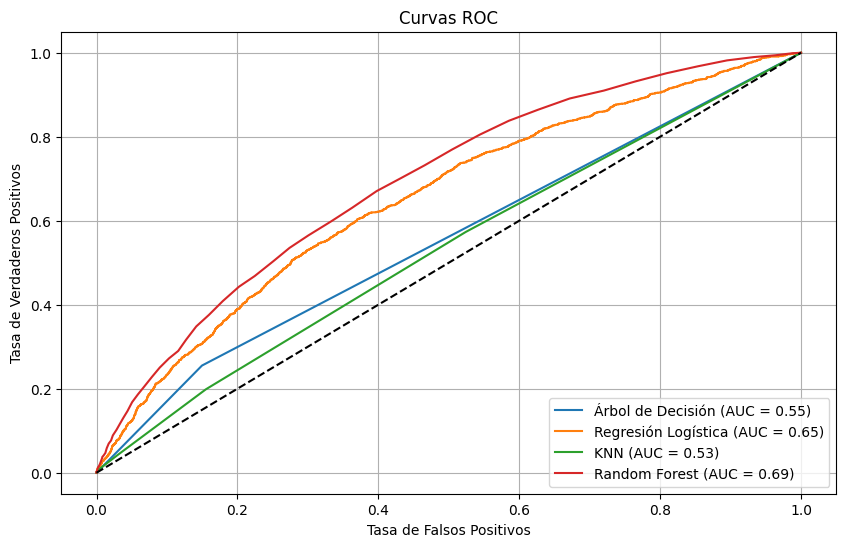

In [ ]:
# Graficar las curvas ROC para cada modelo
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_pred_prob)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_y_pred_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label='Árbol de Decisión (AUC = {:.2f})'.format(dt_auc_roc))
plt.plot(fpr_lr, tpr_lr, label='Regresión Logística (AUC = {:.2f})'.format(lr_auc_roc))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(knn_auc_roc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Utilizaremos la Curva ROC para analizar el comportamiento de cada modelo. Vemos la linea central que nos indica que un modelo solamente predice al azar, mientras mas cercano a la esquina superior izquierda indicará que un modelo es mucho mejor.  
Al graficar cada una de estas, podemos observar que el modelo de Random Forest y Regresión Logística tienen una mejor capacidad predictiva que los demas modelos. Pero en cambio, aunque Árbol de Decisión tenga un valor mas bajo, tiene un F1-Score mejor, y al ser lo mismo que Random Forest pero simple, entonces tambien se analizará este modelo con distintos hiperparametros.

#### Técnica SMOTE

**SMOTE (Synthetic Minority Over-sampling Technique)** es una técnica de aprendizaje automático que se utiliza para aumentar el tamaño de la clase minoritaria en un conjunto de datos desequilibrado. SMOTE hace esto generando nuevos ejemplos de la clase minoritaria mediante la interpolación de los ejemplos existentes.

Esta es una técnica eficaz para aumentar el tamaño de la clase minoritaria y mejorar el rendimiento de los modelos de aprendizaje automático en conjuntos de datos desequilibrados. Sin embargo, es importante tener en cuenta que SMOTE puede introducir sesgos en el conjunto de datos. Por lo tanto, es importante validar los modelos de aprendizaje automático entrenados con conjuntos de datos equilibrados utilizando conjuntos de datos de prueba.

En este caso vamos a ampliar los valores de los datos morosos aumentando hasta un 70% en relación con los no morosos, se realizará con la siguiente linea de código:

```
smote = SMOTE(sampling_strategy=0.7, random_state=42)
```



In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Combina las características y las etiquetas en un solo conjunto de datos
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Aplica SMOTE solo al conjunto de entrenamiento para evitar contaminación en el conjunto de prueba
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts().sort_index())

0    21875
1    15312
Name: loan_status, dtype: int64


In [ ]:
# Modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
dt_auc_roc = roc_auc_score(y_test, dt_y_pred_prob)
dt_y_pred = dt_model.predict(X_test)
dt_f1_score = f1_score(y_test, dt_y_pred)

# Modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
lr_auc_roc = roc_auc_score(y_test, lr_y_pred_prob)
lr_y_pred = lr_model.predict(X_test)
lr_f1_score = f1_score(y_test, lr_y_pred)

# Modelo K-Vecinos más Cercanos (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
knn_y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
knn_auc_roc = roc_auc_score(y_test, knn_y_pred_prob)
knn_y_pred = knn_model.predict(X_test)
knn_f1_score = f1_score(y_test, knn_y_pred)

# Modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
rf_auc_roc = roc_auc_score(y_test, rf_y_pred_prob)
rf_y_pred = rf_model.predict(X_test)
rf_f1_score = f1_score(y_test, rf_y_pred)

# Crear un diccionario con los resultados
results = {
    'Modelo': ['Árbol de Decisión', 'Regresión Logística', 'KNN', 'Random Forest'],
    'AUC-ROC': [dt_auc_roc, lr_auc_roc, knn_auc_roc, rf_auc_roc],
    'F1-score': [dt_f1_score, lr_f1_score, knn_f1_score, rf_f1_score]
}

# Crear una tabla con el estilo deseado
table = tabulate(results, headers='keys', tablefmt='fancy_grid')

# Imprimir la tabla
print(table)


╒═════════════════════╤═══════════╤════════════╕
│ Modelo              │   AUC-ROC │   F1-score │
╞═════════════════════╪═══════════╪════════════╡
│ Árbol de Decisión   │  0.538722 │  0.221911  │
├─────────────────────┼───────────┼────────────┤
│ Regresión Logística │  0.675589 │  0.329543  │
├─────────────────────┼───────────┼────────────┤
│ KNN                 │  0.535893 │  0.230175  │
├─────────────────────┼───────────┼────────────┤
│ Random Forest       │  0.68034  │  0.0468839 │
╘═════════════════════╧═══════════╧════════════╛


Con esta tecnica solamente vemos un mejoramiento por parte de la Regresión Logistica, los demas modelos no tiene un impacto significativo, por lo que descartaremos usar el SMOTE en los demas modelos.

### 7.2 Mejoramiento de los modelos <a name="id72"></a>

#### RandomSearchCV con Regresión Logística y SMOTE

Al ver que se mejoró los resultados de la Regresión Logística al aplicar la técnica SMOTE, vamos a tratar de mejorar el modelo aplicando la técnica de  **RandomSearchCV**.  

El Random Search CV es un algoritmo de búsqueda de hiperparámetros que se utiliza para encontrar los mejores valores de los hiperparámetros de un modelo de aprendizaje automático. Los hiperparámetros son los parámetros que no se aprenden a partir de los datos, sino que se establecen por el usuario.

Esta técnica funciona generando diferentes combinaciones de valores de los hiperparámetros y luego entrenando el modelo con cada combinación. El modelo que obtiene el mejor rendimiento en el conjunto de datos de validación se selecciona como el modelo final.

In [ ]:
#Libreria de aplicar distribución uniforme
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Definir los hiperparámetros a probar en el Randomized Grid Search
param_dist = {
    'C': uniform(loc=0, scale=10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Realizar el Randomized Grid Search
random_search = RandomizedSearchCV(lr_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_lr_model = random_search.best_estimator_

# Entrenar el mejor modelo con los mejores hiperparámetros
best_lr_model.fit(X_train_resampled, y_train_resampled)

# Realizar las predicciones en el conjunto de prueba
lr_y_pred_prob = best_lr_model.predict_proba(X_test)[:, 1]
lr_auc_roc = roc_auc_score(y_test, lr_y_pred_prob)
lr_y_pred = best_lr_model.predict(X_test)
lr_f1_score = f1_score(y_test, lr_y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("AUC-ROC:", lr_auc_roc)
print("F1-score:", lr_f1_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Mejores hiperparámetros: {'C': 7.319939418114051, 'penalty': 'l1', 'solver': 'liblinear'}
AUC-ROC: 0.6434856016623832
F1-score: 0.28936633124830025


Al buscar los diferentes hiperparametros de manera aleatoria, hay posibilidades de que utilizando los hiperparametros por default tenga mejor desempeño que al aplicar esta técnica, esto es lo que nos sucede en este caso, donde al comienzo teniamos mejor valores de AUC-ROC y F1-Score por lo que descartamos este modelo y continuamos con otro.

#### RandomSearchCV con Random Forest y Árbol de decisión

Ya que para nuestra sorpresa vimos que árbol de decisión tenia mejor performance en el F1 Score que su hermana mayor, se realizará la busqueda de los mejores hiperparametros para ambos modelos enfocandose en el F1 score.

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Definir los hiperparámetros y rangos a probar para el Árbol de Decisión
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'class_weight': [None, 'balanced']
}

# Definir los hiperparámetros y rangos a probar para el Random Forest
param_dist_rf = {
    'n_estimators': np.arange(50, 201, 50),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'class_weight': [None, 'balanced']
}

# Crear los modelos
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda aleatoria con RandomizedSearchCV
random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=50, cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='f1', random_state=42, n_jobs=-1)

# Entrenar los modelos con los datos de entrenamiento
random_search_dt.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y los mejores modelos
best_params_dt = random_search_dt.best_params_
best_params_rf = random_search_rf.best_params_
best_dt_model = random_search_dt.best_estimator_
best_rf_model = random_search_rf.best_estimator_

# Realizar las predicciones en el conjunto de prueba
dt_y_pred = best_dt_model.predict(X_test)
rf_y_pred = best_rf_model.predict(X_test)

# Calcular el F1-score en el conjunto de prueba
dt_f1_score = f1_score(y_test, dt_y_pred)
rf_f1_score = f1_score(y_test, rf_y_pred)

# Calcular el AUC-ROC en el conjunto de prueba
dt_auc_roc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
rf_auc_roc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Imprimir los resultados
print("Mejores hiperparámetros para Árbol de Decisión:", best_params_dt)
print("Árbol de Decisión - F1-score:", dt_f1_score)
print("Árbol de Decisión - AUC-ROC:", dt_auc_roc)

print("Mejores hiperparámetros para Random Forest:", best_params_rf)
print("Random Forest - F1-score:", rf_f1_score)
print("Random Forest - AUC-ROC:", rf_auc_roc)


Mejores hiperparámetros para Árbol de Decisión: {'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 6, 'criterion': 'gini', 'class_weight': 'balanced'}
Árbol de Decisión - F1-score: 0.32904100304981365
Árbol de Decisión - AUC-ROC: 0.6718337392771374
Mejores hiperparámetros para Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced'}
Random Forest - F1-score: 0.34463994195537817
Random Forest - AUC-ROC: 0.6920524500496341


Nos quedaremos con el random Forest que tiene mejores resultados que el unico arbol de decisión.

### 7.3 Modelos de Boosting <a name="id73"></a>

Los modelos de Boosting son una familia de algoritmos de aprendizaje automático que combinan múltiples modelos débiles para crear un modelo más potente y preciso. El término "boosting" se refiere a cómo se refuerzan las habilidades predictivas de los modelos débiles a medida que se crean en cascada. Estos modelos tienen la capacidad de corregir los errores de los modelos anteriores y enfocarse más en las observaciones difíciles, mejorando así la capacidad de generalización del modelo final.

En el proceso de boosting, los modelos débiles se crean secuencialmente, y cada uno se enfoca en mejorar la clasificación de ejemplos incorrectos o difíciles del modelo anterior. De esta manera, el modelo final es una combinación ponderada de todos los modelos débiles, donde aquellos con mejor rendimiento y capacidad de corrección de errores tienen una mayor influencia en la predicción final.

1. **XGBoost (Extreme Gradient Boosting)**

XGBoost es una de las bibliotecas de boosting más populares y ampliamente utilizadas en el campo del aprendizaje automático. Es una implementación escalable y eficiente de boosting basada en Gradient Boosting. La fortaleza de XGBoost radica en su capacidad para manejar grandes conjuntos de datos y problemas complejos, obteniendo resultados precisos y rápidos.

La principal característica distintiva de XGBoost es su enfoque en optimizar la función de pérdida a través de algoritmos de regularización y la adición de términos adicionales para controlar el sobreajuste y mejorar la generalización. También utiliza una técnica llamada "árbol a nivel de hoja" que permite que los árboles crezcan de manera más profunda y compleja.

2. **AdaBoost (Adaptive Boosting)**

AdaBoost es un algoritmo de boosting que se enfoca en corregir los errores de predicción de los modelos débiles asignando mayor peso a las observaciones mal clasificadas. Cada modelo débil sucesivo se entrena en el conjunto de datos ponderado para que se enfoque en las observaciones difíciles.

En cada iteración, AdaBoost ajusta un nuevo modelo débil y asigna pesos actualizados a las observaciones, dándole más importancia a las que fueron clasificadas incorrectamente. La combinación ponderada de todos los modelos débiles produce un modelo fuerte que puede realizar predicciones más precisas y generalizadas.

3. **LightGBM (Light Gradient Boosting Machine)**

LightGBM es otra biblioteca de boosting que comparte características con XGBoost y AdaBoost, pero con algunas diferencias clave en su implementación. Está diseñado para ser más rápido y eficiente, especialmente para conjuntos de datos grandes.

LightGBM utiliza una técnica llamada "Histogram-Based Learning" para dividir características de manera eficiente y reduce la complejidad de búsqueda del mejor split. Además, utiliza la estrategia de "Leaf-Wise" para el crecimiento de árboles, lo que le permite construir árboles más profundos y con mayor precisión. Estas características hacen que LightGBM sea una opción popular para problemas que requieren alta eficiencia computacional y rendimiento rápido.

In [ ]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [ ]:
# Modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo con los datos originales (sin SMOTE)
xgb_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc_roc = roc_auc_score(y_test, xgb_y_pred_prob)
xgb_y_pred = xgb_model.predict(X_test)
xgb_f1_score = f1_score(y_test, xgb_y_pred)

XGBoost - AUC-ROC: 0.6706390283608377
XGBoost - F1-score: 0.10850286906624934


In [ ]:
# Definir el modelo base (puede ser cualquier modelo que admita clasificación)
base_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Definir el modelo AdaBoost
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
adaboost_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
adaboost_y_pred_prob = adaboost_model.predict_proba(X_test)[:, 1]
adaboost_auc_roc = roc_auc_score(y_test, adaboost_y_pred_prob)
adaboost_y_pred = adaboost_model.predict(X_test)
adaboost_f1_score = f1_score(y_test, adaboost_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Definir el modelo LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
lgb_model.fit(X_train, y_train)

# Realizar las predicciones en el conjunto de prueba
lgb_y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]
lgb_auc_roc = roc_auc_score(y_test, lgb_y_pred_prob)
lgb_y_pred = lgb_model.predict(X_test)
lgb_f1_score = f1_score(y_test, lgb_y_pred)

LightGBM - AUC-ROC: 0.6976560766980441
LightGBM - F1-score: 0.05031446540880503


In [ ]:
# Crear un diccionario con los resultados
results2 = {
    'Modelo de Boosting': ['XGB Classifier', 'Ada Boost Classifier', 'Light GBM Classifier'],
    'AUC-ROC': [xgb_auc_roc, adaboost_auc_roc, lgb_auc_roc],
    'F1-score': [xgb_f1_score, adaboost_f1_score, lgb_f1_score]
}

# Crear una tabla con el estilo deseado
table2 = tabulate(results2, headers='keys', tablefmt='fancy_grid')

# Imprimir la tabla
print(table2)

╒══════════════════════╤═══════════╤════════════╕
│ Modelo de Boosting   │   AUC-ROC │   F1-score │
╞══════════════════════╪═══════════╪════════════╡
│ XGB Classifier       │  0.670639 │  0.108503  │
├──────────────────────┼───────────┼────────────┤
│ Ada Boost Classifier │  0.664346 │  0.132881  │
├──────────────────────┼───────────┼────────────┤
│ Light GBM Classifier │  0.697656 │  0.0503145 │
╘══════════════════════╧═══════════╧════════════╛


Vemos que Light GBM tiene un performance en el F1 Score mas bajo que Ada Boost y XGBoost, por lo que se descartará. Ada Boost a pesar de que tiene mejores resultados, se emplearpa XGBoost para su posterior mejoramiento al poseer muchos mas hiperparametros que nos ayudará a obtener un mejor modelo.

#### Mejoramiento del modelo XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score

# Definir el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Definir los hiperparámetros a probar en el RandomizedSearchCV
param_dist = {
    'n_estimators': range(50, 201, 50),  # Probamos valores de 50 a 200 en pasos de 50
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': range(3, 11),  # Probamos valores de 3 a 10
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 5, 10]
}

# Realizar el RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

# Realizar las predicciones en el conjunto de prueba
xgb_y_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]
xgb_auc_roc = roc_auc_score(y_test, xgb_y_pred_prob)
xgb_y_pred = best_xgb_model.predict(X_test)
xgb_f1_score = f1_score(y_test, xgb_y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("XGBoost - AUC-ROC:", xgb_auc_roc)
print("XGBoost - F1-score:", xgb_f1_score)


Mejores hiperparámetros: {'subsample': 0.6, 'scale_pos_weight': 5, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 1.0}
XGBoost - AUC-ROC: 0.7010665777797576
XGBoost - F1-score: 0.354858934169279


Se aprecia un claro mejoramiento de la performance del modelo, por lo que se conservará estos valores.

## 8. Modelo final y conclusiones <a name="id8"></a>

A continuación, se realizará un análisis de la matriz de confusión de los tres mejores modelos previamente seleccionados con el propósito de determinar cuál de ellos será mantenido como el modelo final predictor.

Los modelos elegidos son:

- **XGBoost:** Se emplearon los hiperparámetros encontrados mediante un proceso de búsqueda aleatoria (RandomSearchCV).
- **Random Forest:** Se utilizaron los hiperparámetros encontrados a través de un proceso de búsqueda aleatoria (RandomSearchCV).
- **Regresión Logística con técnica SMOTE:** Se aplicó la técnica de re-muestreo SMOTE a la Regresión Logística para abordar el desequilibrio de clases, pero no se realizó una búsqueda adicional de hiperparámetros debido a que se obtuvo un rendimiento inferior en comparación con el modelo default.

La matriz de confusión será evaluada para cada uno de estos modelos, lo que permitirá tomar una decisión informada sobre cuál de ellos se mantendrá como el modelo final, el cual se utilizará para realizar predicciones.

In [ ]:
################################################################################
####################### Tecnica de boosting: XGboost ###########################
################################################################################

import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Definir los mejores hiperparámetros encontrados
best_params_xgbb = { 'subsample': 0.6,  'scale_pos_weight': 5,  'reg_lambda': 0.5,
    'reg_alpha': 0.5, 'n_estimators': 200, 'min_child_weight': 1,'max_depth': 6,
    'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 1.0,  }

# Crear el modelo XGBoost con los mejores hiperparámetros
xgb_model = xgb.XGBClassifier(**best_params_xgbb, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgbb = xgb_model.predict(X_test)

################################################################################
################## Random Forest post RandomSearchCV ###########################
################################################################################

# Crear el modelo de Random Forest con los hiperparámetros proporcionados
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=4,
                                  max_depth=8, criterion='entropy', class_weight='balanced', random_state=42)
# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

################################################################################
################# Regresión Logistica con son oversampling #####################
################################################################################

from imblearn.over_sampling import SMOTE
import numpy as np

# Combina las características y las etiquetas en un solo conjunto de datos
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Aplica SMOTE solo al conjunto de entrenamiento para evitar contaminación en el conjunto de prueba
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)


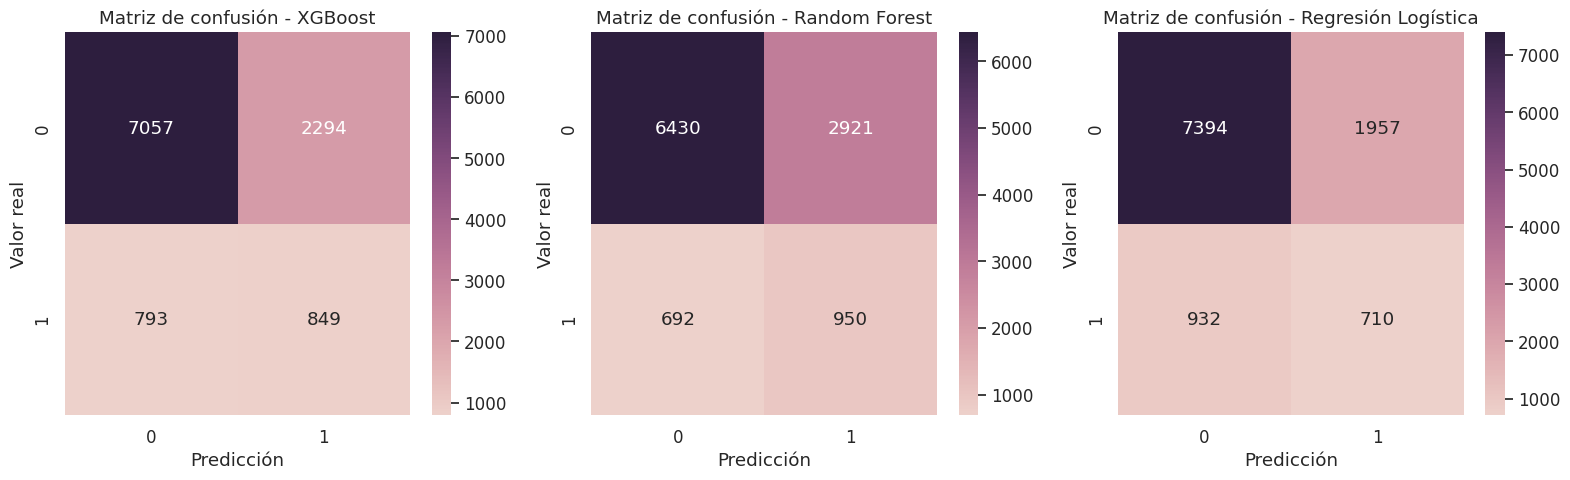

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Matriz de confusión para el primer modelo (XGBoost)
conf_mat2 = confusion_matrix(y_test, y_pred_xgbb)
sns.heatmap(conf_mat2, annot=True, cmap=sns.cubehelix_palette(8, as_cmap=True), fmt="d", ax=axes[0])
axes[0].set_title("Matriz de confusión - XGBoost")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Valor real")

# Matriz de confusión para el segundo modelo (Random Forest)
conf_mat3 = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat3, annot=True, cmap=sns.cubehelix_palette(8, as_cmap=True), fmt="d", ax=axes[1])
axes[1].set_title("Matriz de confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Valor real")

# Matriz de confusión para el tercer modelo (Regresión Logística)
conf_mat4 = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat4, annot=True, cmap=sns.cubehelix_palette(8, as_cmap=True), fmt="d", ax=axes[2])
axes[2].set_title("Matriz de confusión - Regresión Logística")
axes[2].set_xlabel("Predicción")
axes[2].set_ylabel("Valor real")

# Ajustar el diseño para que no se superpongan los títulos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


A simple vista, aunque la Regresión Logística posee la menor cantidad de Falsos positivos.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Calcular el accuracy y el F1-score para el modelo XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgbb)
f1_score_xgboost = f1_score(y_test, y_pred_xgbb, average='weighted')

print("XGBoost - Accuracy:", accuracy_xgboost)
print("XGBoost - F1 Score:", f1_score_xgboost)

# Calcular el accuracy y el F1-score para el modelo Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_rf)
f1_score_random_forest = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest - Accuracy:", accuracy_random_forest)
print("Random Forest - F1 Score:", f1_score_random_forest)

# Calcular el accuracy y el F1-score para el modelo de Regresión Logística
accuracy_logistic_regression = accuracy_score(y_test, y_pred_lr)
f1_score_logistic_regression = f1_score(y_test, y_pred_lr, average='weighted')

print("\nRegresión Logística - Accuracy:", accuracy_logistic_regression)
print("Regresión Logística - F1 Score:", f1_score_logistic_regression)


XGBoost - Accuracy: 0.7191849358682798
XGBoost - F1 Score: 0.7509768856706285

Random Forest - Accuracy: 0.6713363049213136
Random Forest - F1 Score: 0.7155423507569884

Regresión Logística - Accuracy: 0.7371963977076321
Regresión Logística - F1 Score: 0.7608341710773968


Finalmente analizando el F1 Score de cada uno, nos quedaremos con la Regresión Logística, aunque sea un modelo mucho mas simple que el resto, nos dió una performance mejor, esto puede ser por el hecho de que el modelo tiene pocas variables y algunas son muy determinantes.
Par ver cuales son los features que mas afectan al modelo,vamos a graficarlos para apreciarlos mas claramente.

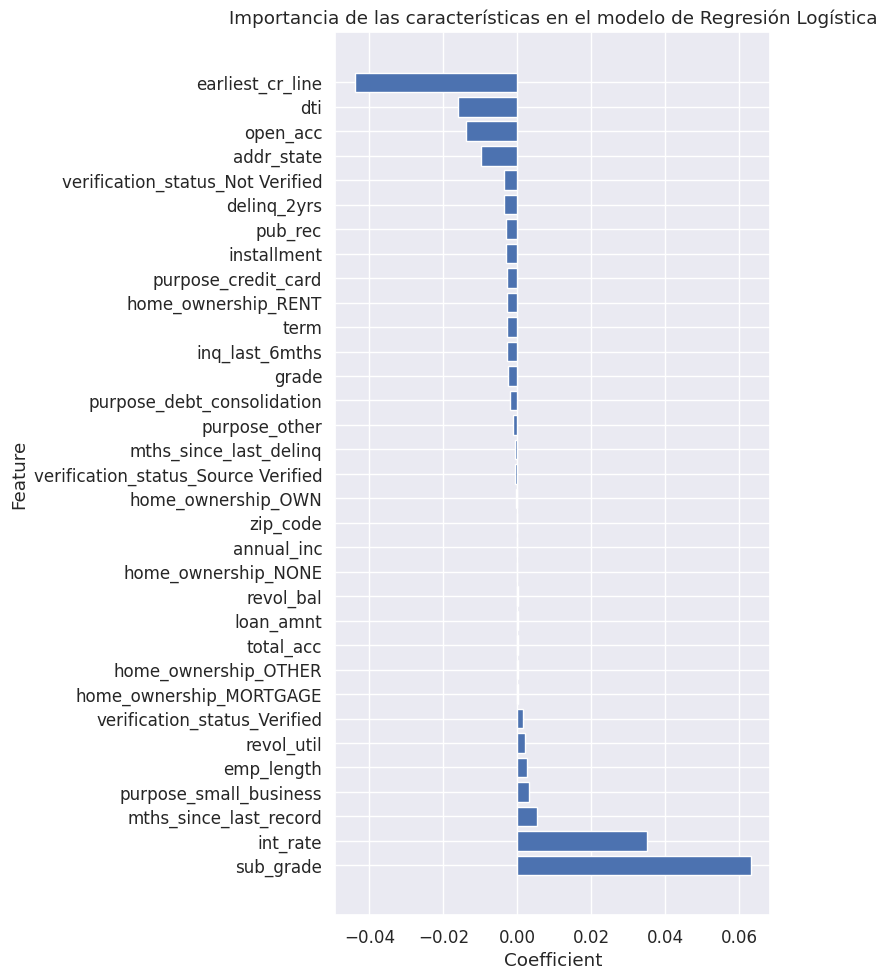

In [ ]:
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo de Regresión Logística
coefficients = lr_model.coef_[0]

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para facilitar la visualización
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Crear el gráfico de barras vertical para mostrar los coeficientes
plt.figure(figsize=(8, 10))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Importancia de las características en el modelo de Regresión Logística')
plt.tight_layout()
plt.show()


En el análisis de la regresión logística, se observa que los valores positivos a la derecha están asociados con las variables que ejercen un mayor impacto en la predicción del valor 1, lo que indica una mayor probabilidad de morosidad. Específicamente, se identificaron dos variables significativas: la **tasa de interés** y el ** Sub Grado**. Es importante destacar que el Sub Grado guarda una estrecha relación con la tasa de interés, ya que un mayor valor de Sub Grado se traduce en una tasa de interés más elevada que debe pagar el prestatario.

Este análisis resalta la relevancia crucial de la tasa de interés en el contexto de préstamos, ya que ejerce una influencia significativa en la probabilidad de que un prestatario pueda incurrir en morosidad.

Por otra parte, los valores negativos en la tabla de características de la regresión logística indican las variables que predicen con mayor probabilidad que el individuo no presentará dificultades para realizar la devolución del préstamo. Estas variables tienen un efecto mitigador en la probabilidad de morosidad y, por ende, son indicativas de una mayor confianza en la capacidad del prestatario para cumplir con sus obligaciones crediticias.

In [ ]:
# Calcular las predicciones para el conjunto original
y_pred_original = lr_model.predict(X_test)

# Calcular el porcentaje de datos predichos como positivos en el conjunto original
percentage_positive_original = (sum(y_pred_original == 1) / len(y_pred_original)) * 100

print(f"Porcentaje de datos predichos como positivos en el conjunto original: {percentage_positive_original:.2f}%")

# Crear un nuevo conjunto con df['int_rate'] multiplicado por 10%
df_new = df.copy()
df_new['int_rate'] = df_new['int_rate'] * 1.1

# Dividir los datos del nuevo conjunto en conjunto de entrenamiento y conjunto de prueba
X_new = df_new.drop('loan_status', axis=1)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=33)

# Calcular las predicciones para el nuveo conjunto de datos multiplicado la tasa por 10%
y_pred_new = lr_model.predict(X_test_new)

# Calcular el porcentaje de datos predichos como positivos
percentage_positive_new = (sum(y_pred_new == 1) / len(y_pred_new)) * 100

print(f"Porcentaje de datos predichos como positivos en el conjunto con la tasa de interés aumentada un 10%: {percentage_positive_new:.2f}%")


Porcentaje de datos predichos como positivos en el conjunto original: 24.26%
Porcentaje de datos predichos como positivos en el conjunto con df['int_rate'] multiplicado por 1.05: 25.96%


Finalmente, se procederá a examinar el impacto de un aumento en la tasa de interés sobre la tasa de morosidad. Para este propósito, se utilizara el modelo previamente hecho de regresión logística utilizando el conjunto de datos original, lo que nos permitirá obtener una predicción inicial de morosidad del 24.26%.

Posteriormente, se generará un conjunto de datos idéntico al anterior, pero con una variación en la tasa de interés de todos los préstamos, aumentándola en un 10% para simular un contexto inflacionario. Al realizar este ajuste, se observa un incremento en la tasa de morosidad, alcanzando un 25.96%. Aunque esta diferencia pueda parecer modesta a primera vista, es esencial destacar que en el caso de miles de préstamos, dicho incremento podría representar una pérdida sustancial de millones de dólares para la entidad financiera.

Este análisis evidencia claramente cómo un aumento en la tasa de interés puede tener un efecto significativo en la tasa de morosidad, lo que subraya la importancia de una evaluación minuciosa de las tasas de interés aplicadas en el contexto de préstamos, considerando sus implicaciones financieras a gran escala para las instituciones bancarias.